In [154]:
# Function to filter data into different flow types
def filter_data(df):
    outbound = df[(df['Origin Region'] == 32003) & (df['Destination Region'] != 32003)]
    inbound = df[(df['Origin Region'] != 32003) & (df['Destination Region'] == 32003)]
    through = df[(df['Origin Region'] != 32003) & (df['Destination Region'] != 32003)]
    intra = df[(df['Origin Region'] == 32003) & (df['Destination Region'] == 32003)]
    return outbound, inbound, through, intra

# Function to summarize flow by region, state, and country
def summarize_flow_by_region(df, flow_type, region_column, state_column, country_column):
    group_by_columns = ['Year', region_column, state_column, country_column]
    summary = df.groupby(group_by_columns).agg({
        'Value': 'sum',
        'Tons': 'sum'
    }).reset_index()
    summary.rename(columns={region_column: 'Region Name', state_column: 'State', country_column: 'Country'}, inplace=True)
    summary.columns = summary.columns.tolist()[:-2] + [f'{flow_type} Value', f'{flow_type} Tons']
    return summary

# Function to summarize flow by state and country
def summarize_flow_by_state_and_country(df, flow_type, state_column, country_column):
    group_by_columns = ['Year', state_column, country_column]
    summary = df.groupby(group_by_columns).agg({
        'Value': 'sum',
        'Tons': 'sum'
    }).reset_index()
    summary.rename(columns={state_column: 'State', country_column: 'Country'}, inplace=True)
    summary.columns = summary.columns.tolist()[:-2] + [f'{flow_type} Value', f'{flow_type} Tons']
    return summary

# Function to summarize flow by country
def summarize_flow_by_country(df, flow_type, country_column):
    group_by_columns = ['Year', country_column]
    summary = df.groupby(group_by_columns).agg({
        'Value': 'sum',
        'Tons': 'sum'
    }).reset_index()
    summary.rename(columns={country_column: 'Country'}, inplace=True)
    summary.columns = summary.columns.tolist()[:-2] + [f'{flow_type} Value', f'{flow_type} Tons']
    return summary

# Load data:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Load data:
clark_county_ts2021 = pd.read_csv("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/Clark_County_TS2021.csv")
bridges_excel = pd.ExcelFile("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/bridges.xlsx")

# Load necessary sheets from the Excel file
stcc = bridges_excel.parse("STCC")
modes = bridges_excel.parse("Modes")
regions = bridges_excel.parse("Regions")

# Define origin_regions and destination_regions separately
origin_regions = regions.rename(columns={"Region": "Origin Region", "Region Name": "Origin Region Name"})
destination_regions = regions.rename(columns={"Region": "Destination Region", "Region Name": "Destination Region Name"})


# Ensure 'STCC4' column in both dataframes is of type string
# For example, replace NaN with a known string
stcc['STCC4'] = stcc['STCC4'].astype(str)
# naics_stcc['STCC4'] = naics_stcc['STCC4'].astype(str)
# naics_stcc['NAICS_code'] = naics_stcc['NAICS_code'].astype(str)
# Create a new DataFrame from 'stcc' that only includes rows with 2-digit 'STCC' codes
stcc_2digit = stcc[stcc['STCC'].str.len() == 2].copy()
# Ensure 'STCC4' is of type string
stcc_2digit['STCC4'] = stcc_2digit['STCC4'].astype(str)
# Merge stcc_2digit and naics_stcc using STCC4
#stcc_2digit = pd.merge(stcc_2digit, naics_stcc, how='left', on='STCC4')
#stcc = pd.merge(stcc, naics_stcc, how='left', on='STCC4')

# Merge stcc (which now includes naics_stcc data) into clark_county_ts2021 using STCC
clark_county_ts2021 = pd.merge(clark_county_ts2021, stcc, how='left', on='STCC')

# Merge modes into clark_county_ts2021 using Mode
clark_county_ts2021 = pd.merge(clark_county_ts2021, modes, how='left', on='Mode')
# Merge origin_regions and destination_regions into clark_county_ts2021
clark_county_ts2021 = pd.merge(clark_county_ts2021, origin_regions, on='Origin Region', how='left')
clark_county_ts2021 = pd.merge(clark_county_ts2021, destination_regions, on='Destination Region', how='left')

# Create 'STCC_2digit' column in 'clark_county_ts2021' DataFrame
clark_county_ts2021['STCC_2digit'] = clark_county_ts2021['STCC'].str[:2]

# Print DataFrame to check
#print(clark_county_ts2021)
# Rename the rest of the columns
clark_county_ts2021.rename(columns={
    'State_x': 'Origin State', 
    'BEA_x': 'Origin BEA', 
    'BEA Name_x': 'Origin BEA Name', 
    'Country_x': 'Origin Country', 
    'State_y': 'Destination State', 
    'BEA_y': 'Destination BEA', 
    'BEA Name_y': 'Destination BEA Name', 
    'Country_y': 'Destination Country'}, inplace=True)



### TO Copy Paste
#summary.to_excel(r'H:\My Drive\7. SNV Industry Study\1.) Summary\Commodity\Files\summary.xlsx', index=False)


In [155]:
# Apply filters to DataFrame
outbound, inbound, through, intra = filter_data(clark_county_ts2021)

# Summarize by Region:
outbound_summary_R = summarize_flow_by_region(outbound, 'OB', 'Destination Region Name', 'Destination State', 'Destination Country')
inbound_summary_R = summarize_flow_by_region(inbound, 'IB', 'Origin Region Name', 'Origin State', 'Origin Country')
through_origin_summary_R = summarize_flow_by_region(through, 'Thr Origin', 'Origin Region Name', 'Origin State', 'Origin Country')
through_destination_summary_R = summarize_flow_by_region(through, 'Thr Destination', 'Destination Region Name', 'Destination State', 'Destination Country')
intra_summary_R = summarize_flow_by_region(intra, 'Intr', 'Origin Region Name', 'Origin State', 'Origin Country')


# Summarize by State and Country:
outbound_summary_ST = summarize_flow_by_state_and_country(outbound, 'OB', 'Destination State', 'Destination Country')
inbound_summary_ST = summarize_flow_by_state_and_country(inbound, 'IB', 'Origin State', 'Origin Country')
through_origin_summary_ST = summarize_flow_by_state_and_country(through, 'Thr Origin', 'Origin State', 'Origin Country')
through_destination_summary_ST = summarize_flow_by_state_and_country(through, 'Thr Destination', 'Destination State', 'Destination Country')
intra_summary_ST = summarize_flow_by_state_and_country(intra, 'Intr', 'Origin State', 'Origin Country')
# ...

# Summarize by Country:
outbound_summary_C = summarize_flow_by_country(outbound, 'OB', 'Destination Country')
inbound_summary_C = summarize_flow_by_country(inbound, 'IB', 'Origin Country')
through_origin_summary_C = summarize_flow_by_country(through, 'Thr Origin', 'Origin Country')
through_destination_summary_C = summarize_flow_by_country(through, 'Thr Destination', 'Destination Country')
intra_summary_C = summarize_flow_by_country(intra, 'Intr', 'Origin Country')
# ...

# Print totals:
total_sum = through_origin_summary_C['Thr Origin Value'].sum()
print(f"The total sum of the through_origin_summary_C 'Thr Origin Value' is {total_sum}")
# ...


The total sum of the through_origin_summary_C 'Thr Origin Value' is 552841471775.4816


In [156]:
final_summary_R = outbound_summary_R.merge(inbound_summary_R, on=['Year', 'Region Name', 'State', 'Country'], how='outer')
final_summary_R = final_summary_R.merge(through_origin_summary_R, on=['Year', 'Region Name', 'State', 'Country'], how='outer')
final_summary_R = final_summary_R.merge(through_destination_summary_R, on=['Year', 'Region Name', 'State', 'Country'], how='outer')
final_summary_R = final_summary_R.merge(intra_summary_R, on=['Year', 'Region Name', 'State', 'Country'], how='outer')

In [157]:
final_summary_ST = outbound_summary_ST.merge(inbound_summary_ST, on=['Year', 'State', 'Country'], how='outer')
final_summary_ST = final_summary_ST.merge(through_origin_summary_ST, on=['Year', 'State', 'Country'], how='outer')
final_summary_ST = final_summary_ST.merge(through_destination_summary_ST, on=['Year', 'State', 'Country'], how='outer')
final_summary_ST = final_summary_ST.merge(intra_summary_ST, on=['Year', 'State', 'Country'], how='outer')


In [158]:
final_summary_C = outbound_summary_C.merge(inbound_summary_C, on=['Year', 'Country'], how='outer')
final_summary_C = final_summary_C.merge(through_origin_summary_C, on=['Year', 'Country'], how='outer')
final_summary_C = final_summary_C.merge(through_destination_summary_C, on=['Year', 'Country'], how='outer')
final_summary_C = final_summary_C.merge(intra_summary_C, on=['Year', 'Country'], how='outer')


In [77]:
total_sum_ST = through_origin_summary_ST['Thr Origin Value'].sum()
print(f"The total sum of the through_origin_summary_ST 'Thr Origin Value' is {total_sum_ST}")

total_sum_ST = through_destination_summary_ST['Thr Destination Value'].sum()
print(f"The total sum of the through_destination_summary_ST 'Thr Destination Value' is {total_sum_ST}")


The total sum of the through_origin_summary_ST 'Thr Origin Value' is 552841471775.4443
The total sum of the through_destination_summary_ST 'Thr Destination Value' is 552841471775.4614


In [9]:
total_sum_R = through_origin_summary_R['Thr Origin Value'].sum()
print(f"The total sum of the through_origin_summary_R 'Thr Origin Value' is {total_sum_R}")

total_sum_R = through_destination_summary_R['Thr Destination Value'].sum()
print(f"The total sum of the through_destination_summary_R 'Thr Destination Value' is {total_sum_R}")


The total sum of the through_origin_summary_R 'Thr Origin Value' is 552841471775.4436
The total sum of the through_destination_summary_R 'Thr Destination Value' is 552841471775.4507


In [10]:
total_sum_C = through_destination_summary_C['Thr Destination Value'].sum()
print(f"The total sum of the through_destination_summary_C 'Thr Destination Value' is {total_sum_C}")

total_sum_C = inbound_summary_C['IB Value'].sum()
print(f"The total sum of the inbound_summary_C 'IB Value' is {total_sum_C}")

total_sum_C = outbound_summary_C['OB Value'].sum()
print(f"The total sum of the outbound_summary_C 'OB Value' is {total_sum_C}")


The total sum of the through_destination_summary_C 'Thr Destination Value' is 552841471775.4811
The total sum of the inbound_summary_C 'IB Value' is 134487286430.7612
The total sum of the outbound_summary_C 'OB Value' is 31703791482.430595


In [12]:
total_sum = through_destination_summary_C['Thr Destination Value'].sum()
print(f"The total sum of the through_destination_summary_C 'Thr Destination Value' is {total_sum}")
# ...
total_sum = through_origin_summary_C['Thr Origin Value'].sum()
print(f"The total sum of the through_origin_summary_C 'Thr Origin Value' is {total_sum}")
# ...


The total sum of the through_destination_summary_C 'Thr Destination Value' is 552841471775.4811
The total sum of the through_origin_summary_C 'Thr Origin Value' is 552841471775.4816


In [9]:
final_summary_C

,Year,Country,OB Value,OB Tons,IB Value,IB Tons,Thr Origin Value,Thr Origin Tons,Thr Destination Value,Thr Destination Tons,Intr Value,Intr Tons
0,2015,CA,2.740712e+08,6.972143e+04,3.789786e+08,2.585833e+05,1.422369e+10,2.355831e+06,5.879073e+09,1.284952e+06,NaN,NaN
1,2015,MX,5.694821e+08,9.782909e+04,4.674276e+08,1.182158e+05,1.410144e+09,1.527795e+05,1.716161e+09,8.421733e+05,NaN,NaN
2,2015,US,5.359368e+09,6.016162e+06,2.737902e+10,1.724997e+07,1.060750e+11,4.819453e+07,1.141137e+11,4.857602e+07,8.165316e+09,1.610371e+07
3,2019,CA,2.782379e+08,6.178344e+04,4.950276e+08,2.856832e+05,1.304373e+10,2.124855e+06,5.325549e+09,1.287333e+06,NaN,NaN
4,2019,MX,3.517738e+08,6.529158e+04,6.202555e+08,1.546833e+05,1.342453e+09,1.590279e+05,6.947760e+08,4.260010e+05,NaN,NaN
5,2019,US,6.044934e+09,5.811412e+06,2.715480e+10,1.812372e+07,9.953154e+10,4.633434e+07,1.078974e+11,4.690489e+07,9.045947e+09,1.633485e+07
6,2021,CA,3.456530e+08,6.752876e+04,7.221300e+08,4.163034e+05,1.231587e+10,2.519731e+06,6.196029e+09,1.423040e+06,NaN,NaN
7,2021,MX,3.901267e+08,7.220680e+04,7.931717e+08,2.070051e+05,1.518588e+09,1.831356e+05,7.006417e+08,4.713985e+05,NaN,NaN
8,2021,US,6.238153e+09,5.865877e+06,2.764964e+10,1.784366e+07,1.005795e+11,4.593842e+07,1.075173e+11,4.674685e+07,9.073076e+09,1.606648e+07
9,2050,CA,5.936028e+08,1.395114e+05,1.519939e+09,8.671547e+05,2.166383e+10,5.499458e+06,1.223031e+10,2.702818e+06,NaN,NaN


In [27]:
final_summary_C.fillna(0, inplace=True)


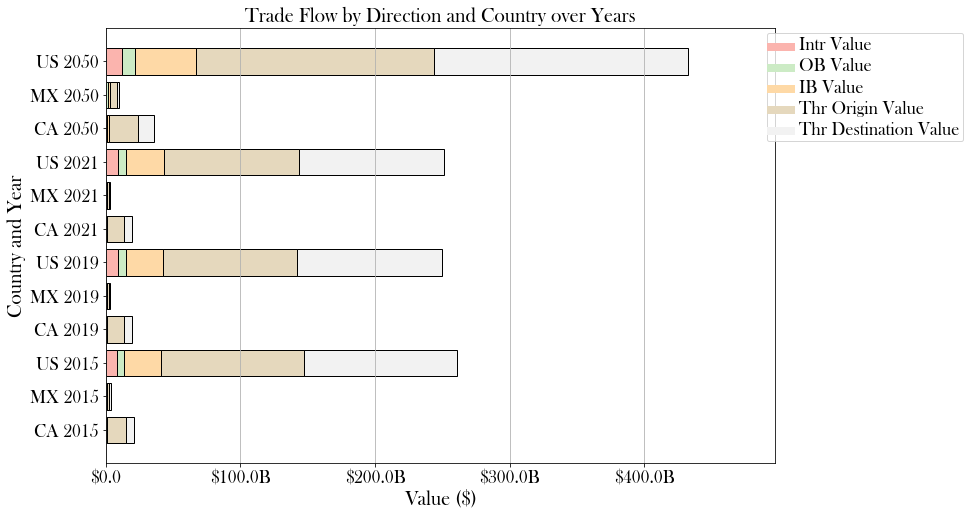

In [72]:
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties

# # Define custom colors
# colors = ['#fbb4ae',  # light pink
#           '#b3cde3',  # light purple
#           '#ccebc5',  # tanish beige
#           '#a6cee3']  # light cyan or blue


# Font properties
font = FontProperties(family='Baskerville Old Face')

def create_stacked_bar_chart(df):
    fig, ax = plt.subplots(figsize=(12, 8))
    directions = ['Intr Value','OB Value', 'IB Value', 'Thr Origin Value', 'Thr Destination Value']
    colors = plt.cm.Pastel1(np.linspace(0, 1, len(directions)))

    max_y_value = 0
    for year in df['Year'].unique():
        year_data = df[df['Year'] == year]
        total_for_year = year_data[directions].sum().sum()
        for idx, row in year_data.iterrows():
            left_value = 0
            for i, direction in enumerate(directions):
                rects = ax.barh(row['Country'] + ' ' + str(row['Year']), row[direction],
                                color=colors[i], edgecolor='black', left=left_value,
                                label=direction if year == df['Year'].unique()[0] else "", alpha=1.0)

                width = rects[0].get_width()
                max_y_value = max(max_y_value, left_value + width)

                left_value += row[direction]

    ax.set_xlim([0, max_y_value * 1.15])  # Adjust the X-axis limits to reduce blank space

    legend_elements = [plt.Line2D([0], [0], color=colors[i], lw=8, label=direction) for i, direction in enumerate(directions)]
    legend = ax.legend(handles=legend_elements, bbox_to_anchor=(0.98, 1), loc='upper left')

    # Apply the font properties to the legend, X and Y-axis ticks
    for text in legend.get_texts():
        text.set_fontproperties(font)
        text.set_fontsize(18)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(font)
        tick.set_fontsize(18)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(font)
        tick.set_fontsize(18)

    ax.xaxis.set_major_formatter(FuncFormatter(value_formatter)) # Apply formatter to X-axis
    ax.xaxis.grid(True, linestyle='-')  # Remove X-axis grid lines, but keep Y-axis grid lines
    #ax.yaxis.grid(True, linestyle='--')  # Enable Y-axis grid lines
    ax.set_title('Trade Flow by Direction and Country over Years', fontsize=20, fontproperties=font)
    ax.set_xlabel('Value ($)', fontsize=20, fontproperties=font)
    ax.set_ylabel('Country and Year', fontsize=20, fontproperties=font)
    plt.show()

# Call the function with the final_summary_C DataFrame
create_stacked_bar_chart(final_summary_C)



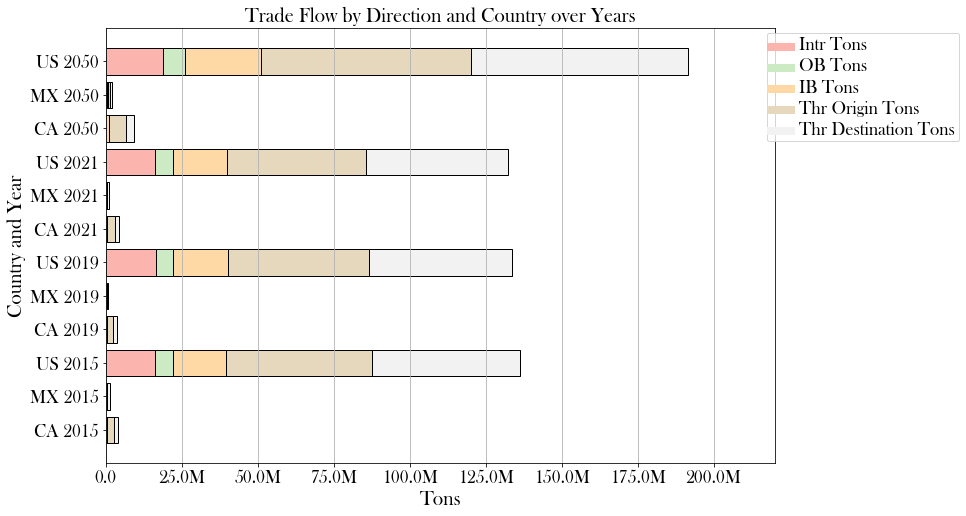

In [73]:
# Tons formatter
def tons_formatter(x, pos):
    return f'{x / 1_000_000:.1f}M' if x >= 1_000_000 else f'{x / 1_000:.1f}K' if x >= 1_000 else f'{x}'

def create_stacked_bar_chart_tons(df):
    fig, ax = plt.subplots(figsize=(12, 8))
    directions = ['Intr Tons', 'OB Tons', 'IB Tons', 'Thr Origin Tons', 'Thr Destination Tons'] # Columns for tons
    colors = plt.cm.Pastel1(np.linspace(0, 1, len(directions)))

    max_y_value = 0
    for year in df['Year'].unique():
        year_data = df[df['Year'] == year]
        total_for_year = year_data[directions].sum().sum()
        for idx, row in year_data.iterrows():
            left_value = 0
            for i, direction in enumerate(directions):
                rects = ax.barh(row['Country'] + ' ' + str(row['Year']), row[direction],
                                color=colors[i], edgecolor='black', left=left_value,
                                label=direction if year == df['Year'].unique()[0] else "", alpha=1.0)

                width = rects[0].get_width()
                max_y_value = max(max_y_value, left_value + width)

                left_value += row[direction]

    ax.set_xlim([0, max_y_value * 1.15])  # Adjust the X-axis limits to reduce blank space

    legend_elements = [plt.Line2D([0], [0], color=colors[i], lw=8, label=direction) for i, direction in enumerate(directions)]
    legend = ax.legend(handles=legend_elements, bbox_to_anchor=(0.98, 1), loc='upper left')

    # Apply the font properties to the legend, X and Y-axis ticks
    for text in legend.get_texts():
        text.set_fontproperties(font)
        text.set_fontsize(18)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(font)
        tick.set_fontsize(18)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(font)
        tick.set_fontsize(18)

    ax.xaxis.set_major_formatter(FuncFormatter(tons_formatter)) # Apply formatter to X-axis for tons
    ax.xaxis.grid(True, linestyle='-')  # Remove X-axis grid lines, but keep Y-axis grid lines
    ax.set_title('Trade Flow by Direction and Country over Years', fontsize=20, fontproperties=font)
    ax.set_xlabel('Tons', fontsize=20, fontproperties=font) # Change label to "Tons"
    ax.set_ylabel('Country and Year', fontsize=20, fontproperties=font)
    plt.show()

# Call the function with the final_summary_C DataFrame for tons
create_stacked_bar_chart_tons(final_summary_C)


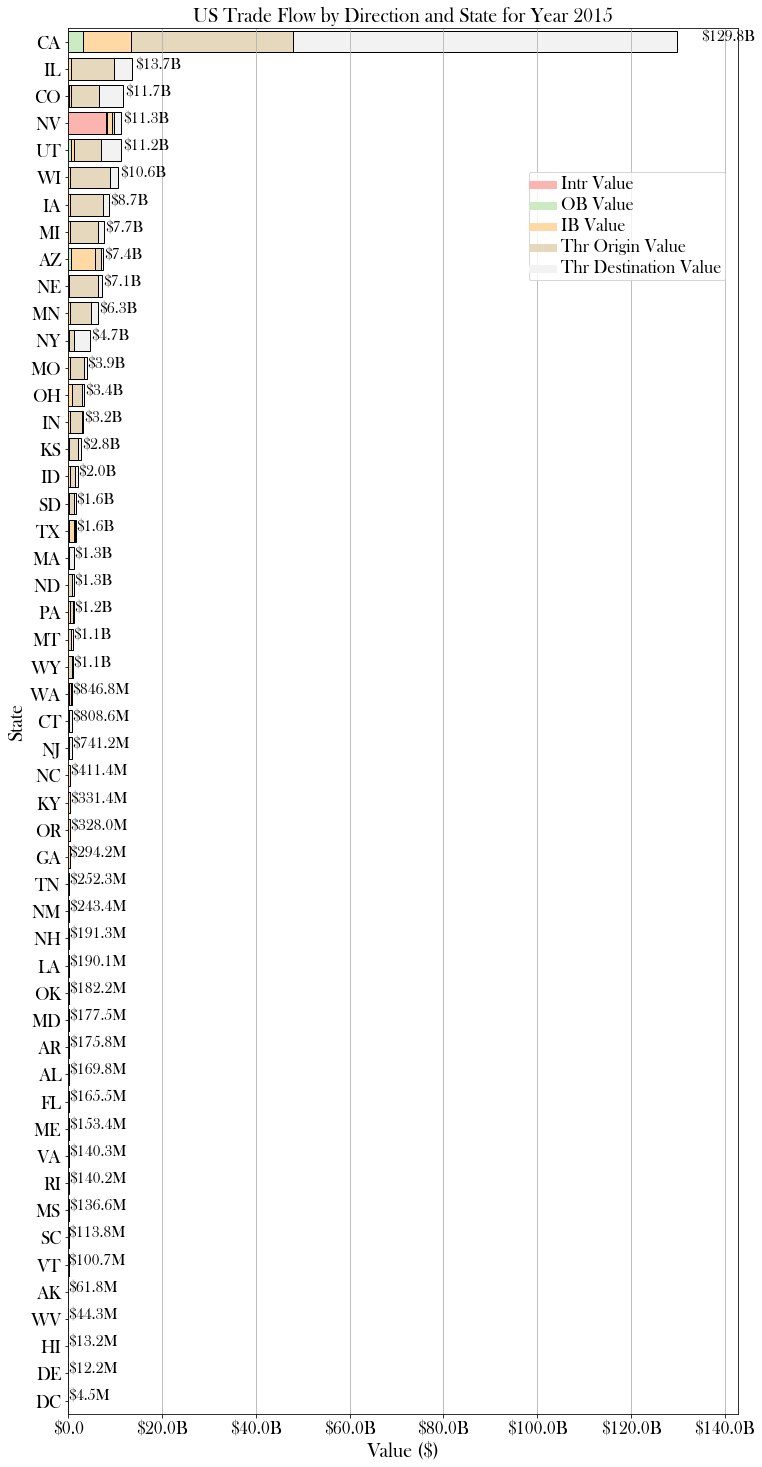

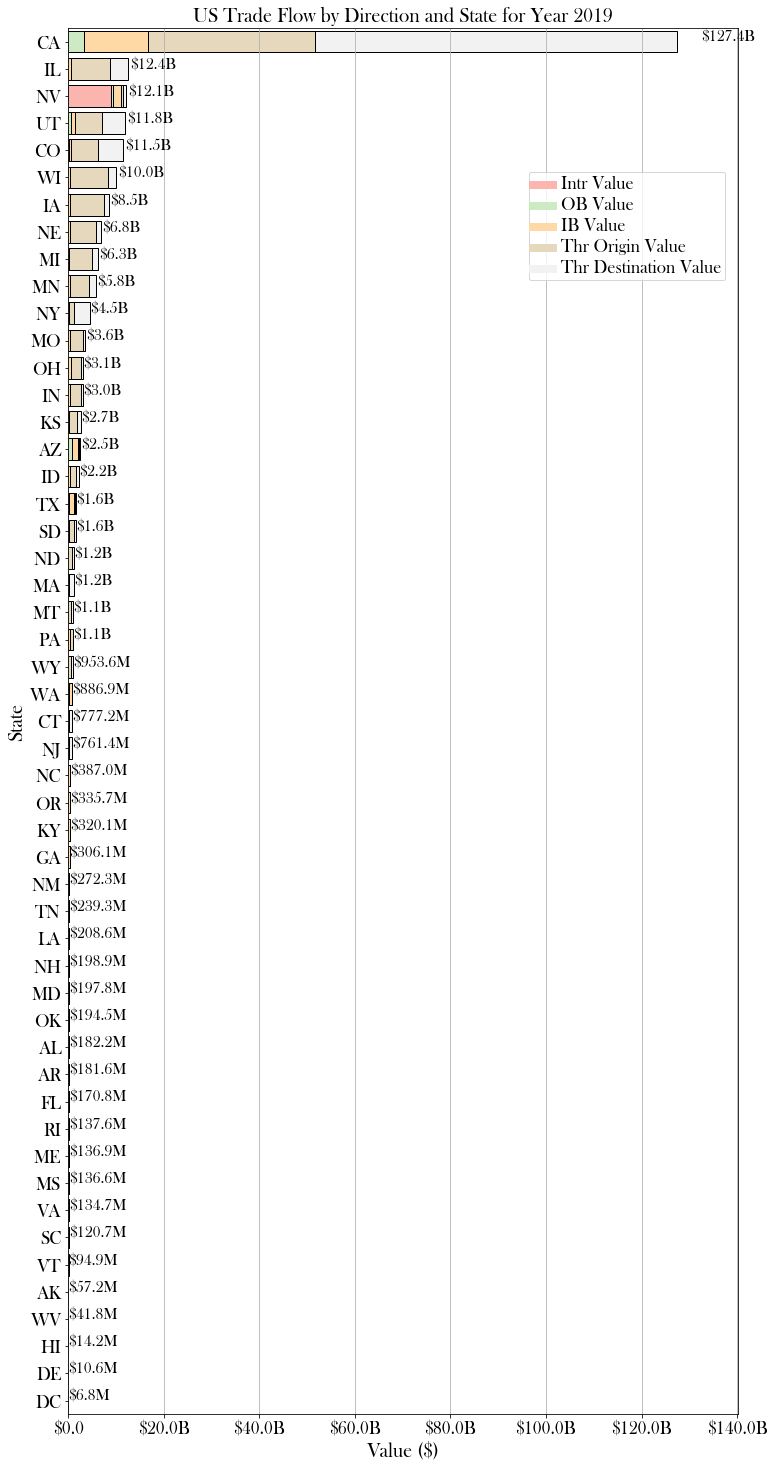

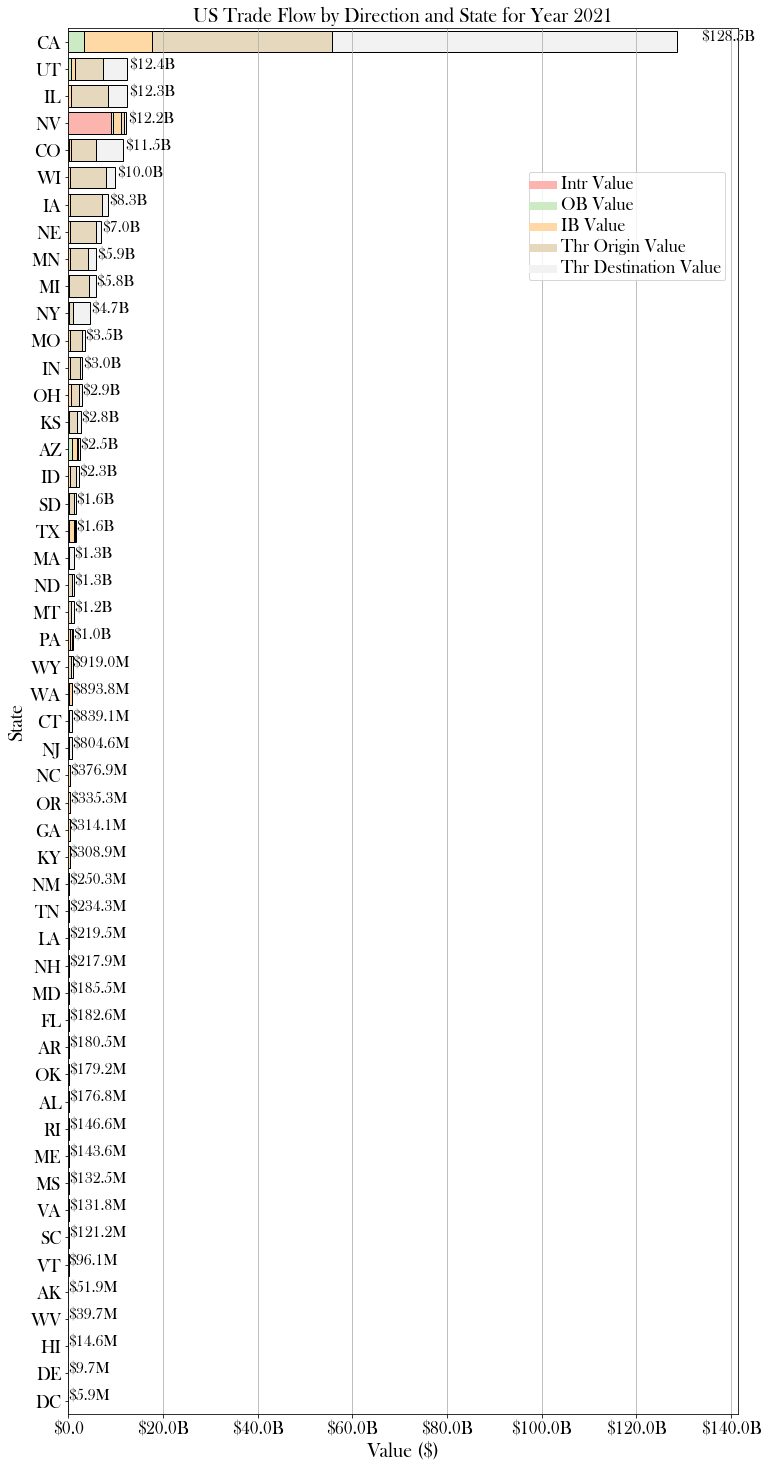

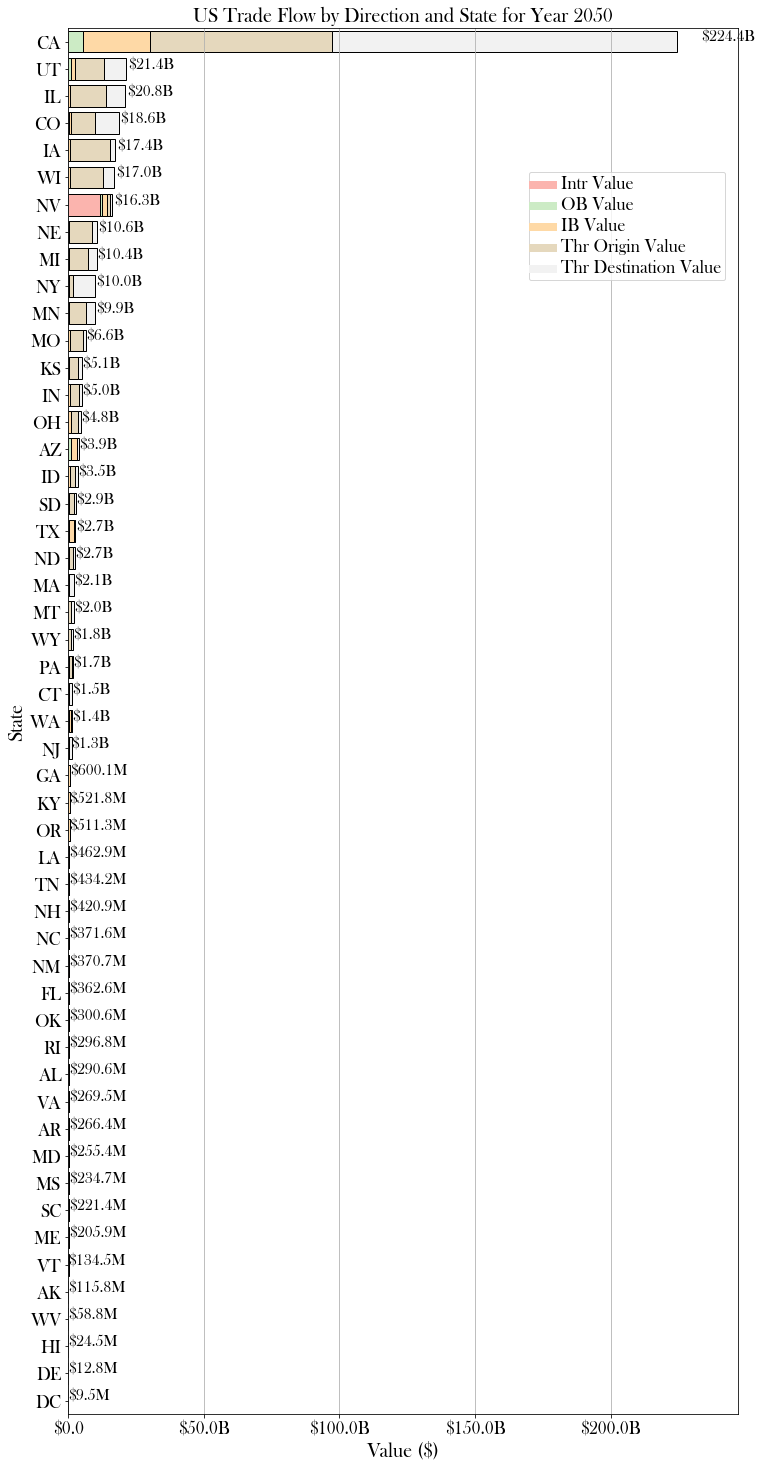

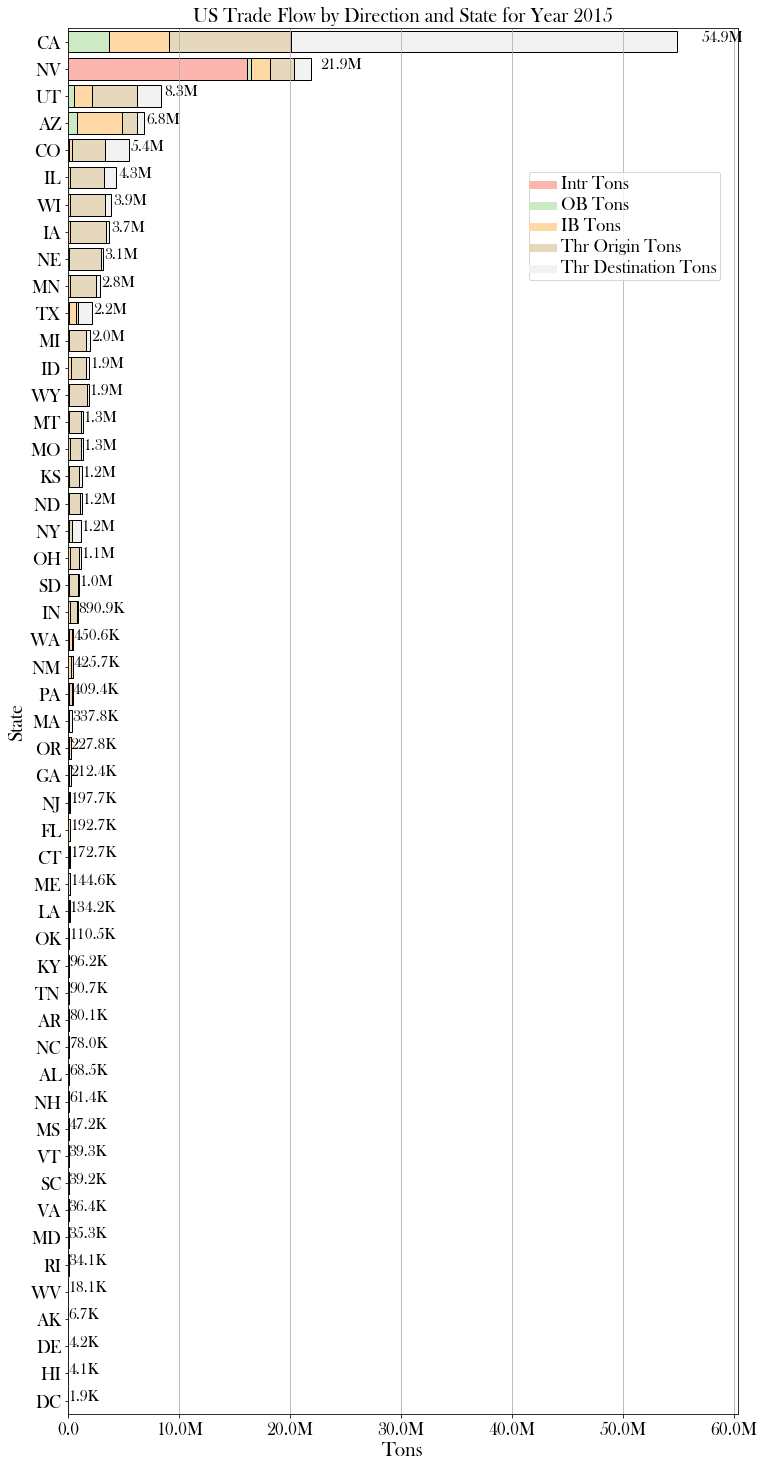

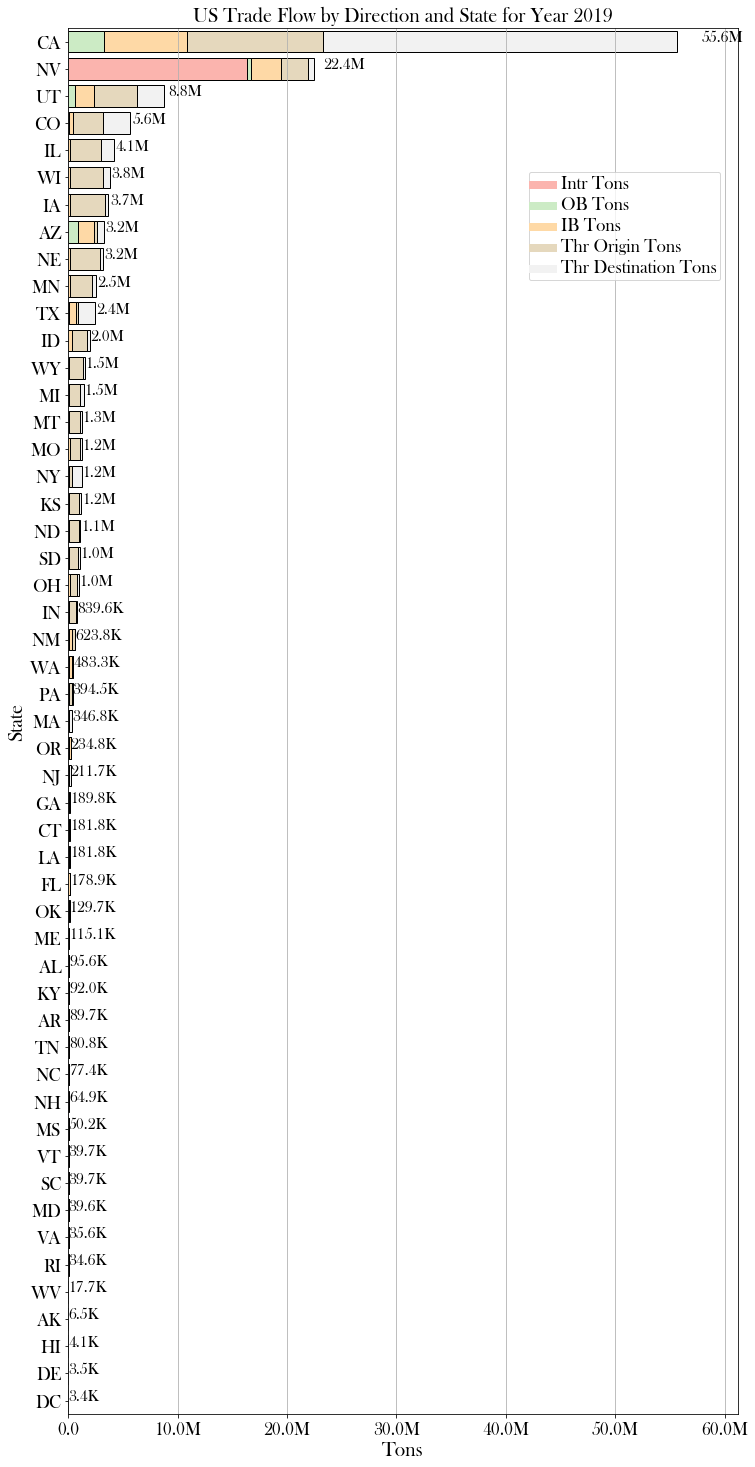

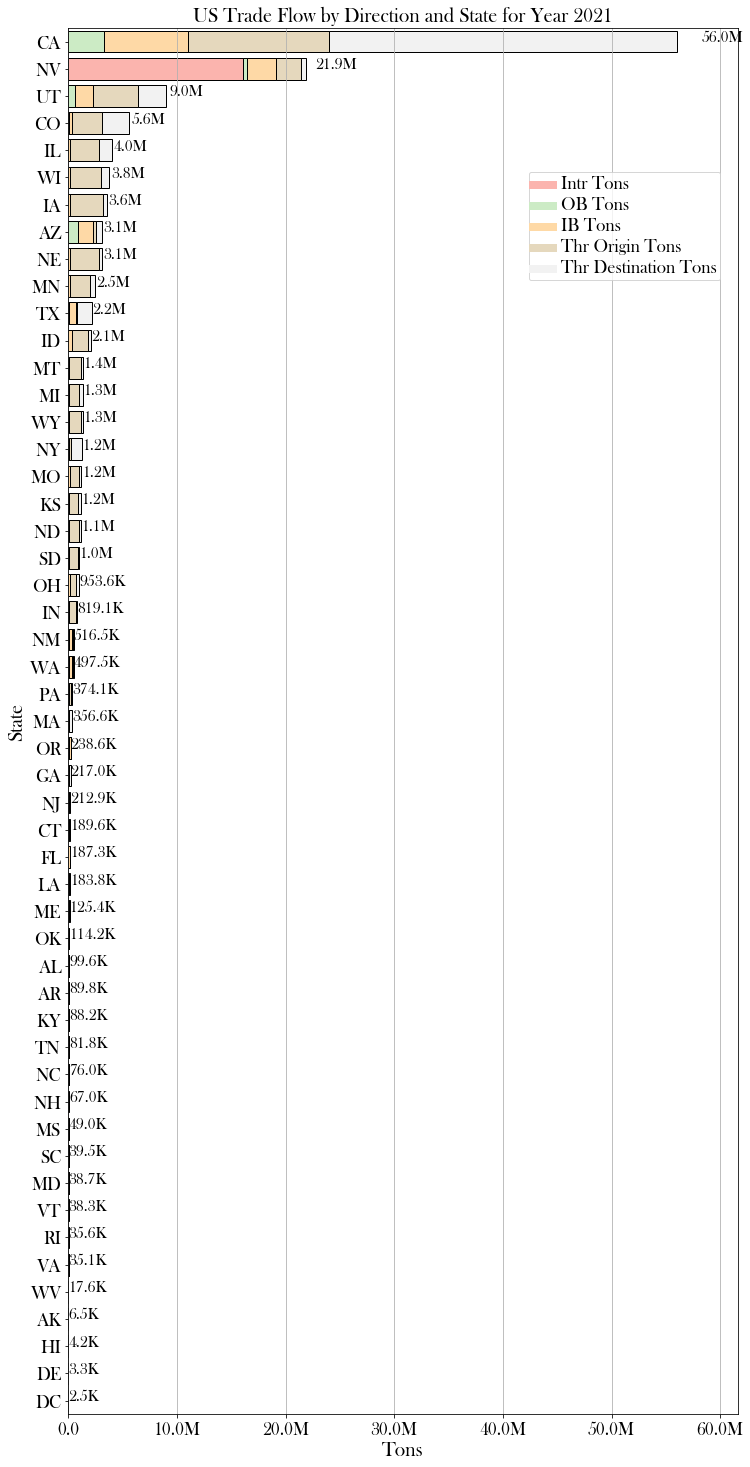

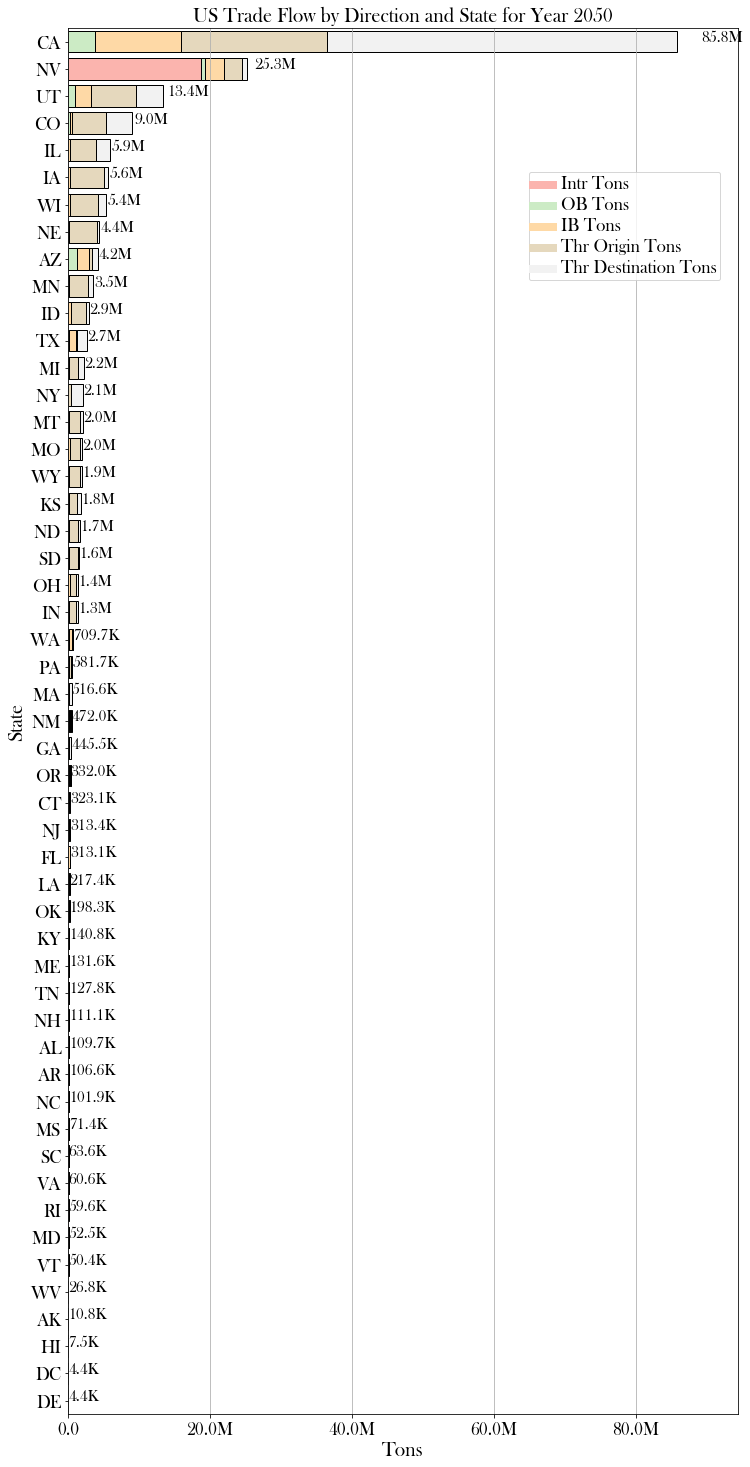

In [138]:
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
import pandas as pd
import numpy as np

font = FontProperties(family='Baskerville Old Face')

def formatter(x, pos):
    if data_type == 'Value':
        return f'${x / 1_000_000_000:.1f}B' if x >= 1_000_000_000 else f'${x / 1_000_000:.1f}M' if x >= 1_000_000 else f'${x / 1_000:.1f}K' if x >= 1_000 else f'${x:.1f}'
    else:
        return f'{x / 1_000_000:.1f}M' if x >= 1_000_000 else f'{x / 1_000:.1f}K' if x >= 1_000 else f'{x:.1f}'
    
    num_groups = len(df[group_by].unique())
    for year in df['Year'].unique():
        year_data = df[df['Year'] == year]
        unique_groups = year_data[group_by].unique()
        fig, ax = plt.subplots(figsize=(12, len(unique_groups) * 0.8))
        directions = [f'Intr {data_type}', f'OB {data_type}', f'IB {data_type}', f'Thr Origin {data_type}', f'Thr Destination {data_type}']
        colors = plt.cm.Pastel1(np.linspace(0, 1, len(directions)))
        
         # Set y-limits to control the white space
        ax.set_ylim([-0.5, len(unique_groups) - 0.5])

        max_y_value = 0
        bar_index = 0
        for idx, row in year_data.iterrows():
            left_value = 0
            total_value = 0
            for i, direction in enumerate(directions):
                value = row[direction] if not pd.isnull(row[direction]) else 0
                # Inside the loop where you create the bars, set the height parameter
                rects = ax.barh(row[group_by], value, color=colors[i], edgecolor='black', left=left_value,
                                label=direction if year == df['Year'].unique()[0] else "", alpha=1.0, height=0.8)
                width = rects[0].get_width()
                max_y_value = max(max_y_value, left_value + width)
                left_value += value
                total_value += value

            ax.annotate(formatter(total_value, 0),
                        xy=(total_value + (max_y_value * 0.02), bar_index), xycoords='data', fontsize=14, fontproperties=font)

            bar_index += 1

        ax.set_xlim([0, max_y_value * 1.4])

        legend_elements = [plt.Line2D([0], [0], color=colors[i], lw=8, label=direction) for i, direction in enumerate(directions)]
        legend = ax.legend(handles=legend_elements, bbox_to_anchor=(0.68, .5), loc='upper left')

        for text in legend.get_texts():
            text.set_fontproperties(font)
            text.set_fontsize(18)
        for tick in ax.get_xticklabels():
            tick.set_fontproperties(font)
            tick.set_fontsize(18)
        for tick in ax.get_yticklabels():
            tick.set_fontproperties(font)
            tick.set_fontsize(18)

        ax.xaxis.set_major_formatter(FuncFormatter(formatter))
        ax.xaxis.grid(True, linestyle='-')
        ax.set_title(f'US Trade Flow by Direction and {group_by} for Year {year}', fontsize=20, fontproperties=font)
        ax.set_xlabel(data_type + (' ($)' if data_type == 'Value' else ''), fontsize=20, fontproperties=font)
        ax.set_ylabel(f'{group_by}', fontsize=20, fontproperties=font)
        plt.show()

# Call the function with the final_summary_C DataFrame
final_summary_ST_US = final_summary_ST[final_summary_ST['Country'] == 'US']

# Call the function with the filtered DataFrame
create_stacked_bar_chart(final_summary_ST_US, data_type='Value', group_by='State')
create_stacked_bar_chart(final_summary_ST_US, data_type='Tons', group_by='State')


In [173]:
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

font = FontProperties(family='Baskerville Old Face')
def formatter(x, pos, data_type):
    if data_type == 'Value':
        if x >= 1_000_000_000:
            return f'${x / 1_000_000_000:.1f}B'
        elif x >= 1_000_000:
            return f'${x / 1_000_000:.1f}M'
        elif x >= 1_000:
            return f'${x / 1_000:.1f}K'
        else:
            return f'${x:,.1f}'
    else: # Handling 'Tons' or other non-Value data types
        if x >= 1_000_000:
            return f'{x / 1_000_000:.1f}M'
        elif x >= 1_000:
            return f'{x / 1_000:.1f}K'
        elif x == 0: # Add this condition to handle the specific case of 0
            return '0'
        else:
            return f'{x:.0f}' # Change this to round to whole numbers


    for year in df['Year'].unique():
        year_data = df[df['Year'] == year].copy()  # Create a copy of the slice
        year_data['total_value'] = year_data[[f'Intr {data_type}', f'OB {data_type}', f'IB {data_type}', f'Thr Origin {data_type}', f'Thr Destination {data_type}']].sum(axis=1)
        year_data = year_data.sort_values('total_value', ascending=True)
        unique_groups = year_data[group_by].unique()
        fig, ax = plt.subplots(figsize=(12, len(unique_groups) * 0.5))


        # Set y-limits to control the white space
        ax.set_ylim([-0.5, len(unique_groups) - 0.5])

        directions = [f'Intr {data_type}', f'OB {data_type}', f'IB {data_type}', f'Thr Origin {data_type}', f'Thr Destination {data_type}']
        colors = plt.cm.Pastel1(np.linspace(0, 1, len(directions)))

        max_y_value = 0
        bar_index = 0
        for idx, row in year_data.iterrows():
            left_value = 0
            total_value = 0
            for i, direction in enumerate(directions):
                value = row[direction] if not pd.isnull(row[direction]) else 0
                rects = ax.barh(row[group_by], value, color=colors[i], edgecolor='black', left=left_value,
                                label=direction if year == df['Year'].unique()[0] else "", alpha=1.0, height=0.8)
                width = rects[0].get_width()
                max_y_value = max(max_y_value, left_value + width)
                left_value += value
                total_value += value

            ax.annotate(formatter(total_value, 0, data_type), # Pass data_type to the formatter
            xy=(total_value + (max_y_value * 0.04), bar_index), xycoords='data', fontsize=16, color='black', fontproperties=font)

            bar_index += 1

        ax.set_xlim([0, max_y_value * 1.1])

        legend_elements = [plt.Line2D([0], [0], color=colors[i], lw=8, label=direction) for i, direction in enumerate(directions)]
        legend = ax.legend(handles=legend_elements, bbox_to_anchor=(0.68, .9), loc='upper left')

        for text in legend.get_texts():
            text.set_fontproperties(font)
            text.set_fontsize(18)
        for tick in ax.get_xticklabels():
            tick.set_fontproperties(font)
            tick.set_fontsize(18)
        for tick in ax.get_yticklabels():
            tick.set_fontproperties(font)
            tick.set_fontsize(18)

        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: formatter(x, pos, data_type))) # Pass data_type to the formatter
        ax.xaxis.grid(True, linestyle='-')
        ax.set_title(f'US Trade Flow by Direction and {group_by} for Year {year}', fontsize=20, fontproperties=font)
        ax.set_xlabel(data_type + (' ($)' if data_type == 'Value' else ''), fontsize=20, fontproperties=font)
        ax.set_ylabel(f'{group_by}', fontsize=20, fontproperties=font)
        plt.show()

#final_summary_ST_US = final_summary_ST[final_summary_ST['Country'] == 'US']

# Call the function with the filtered DataFrame
#create_stacked_bar_chart(final_summary_ST_US, data_type='Value', group_by='State')
#create_stacked_bar_chart(final_summary_ST_US, data_type='Tons', group_by='State')


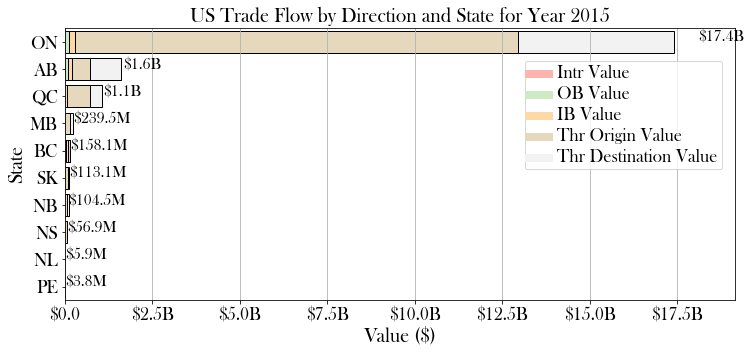

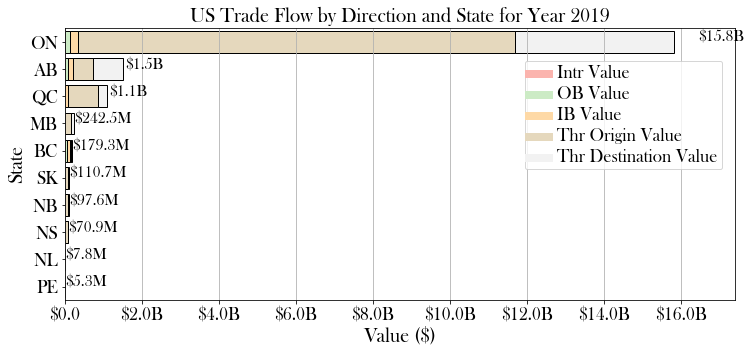

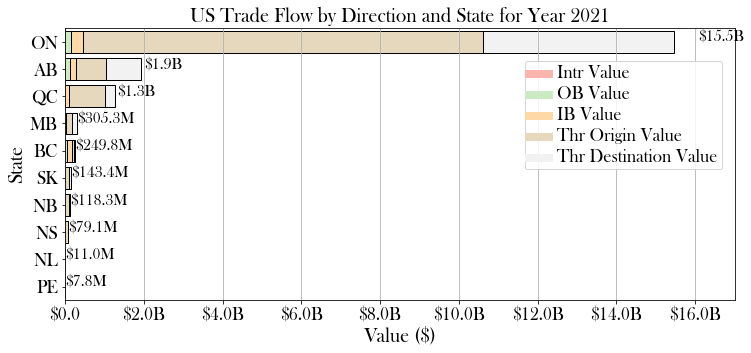

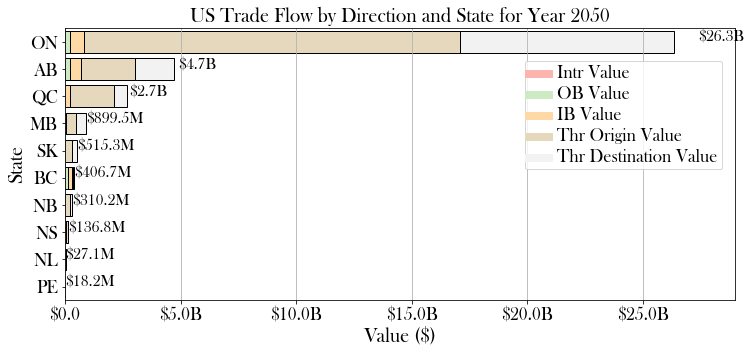

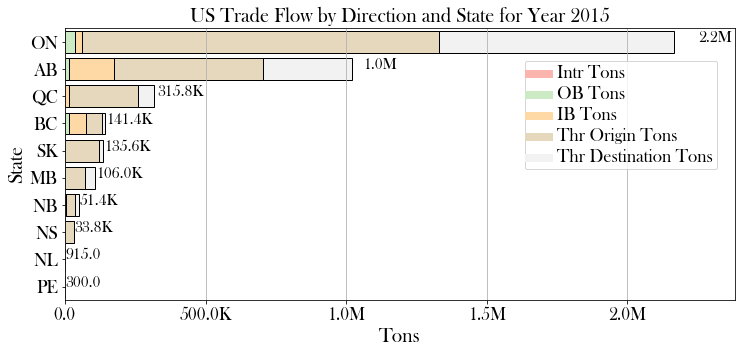

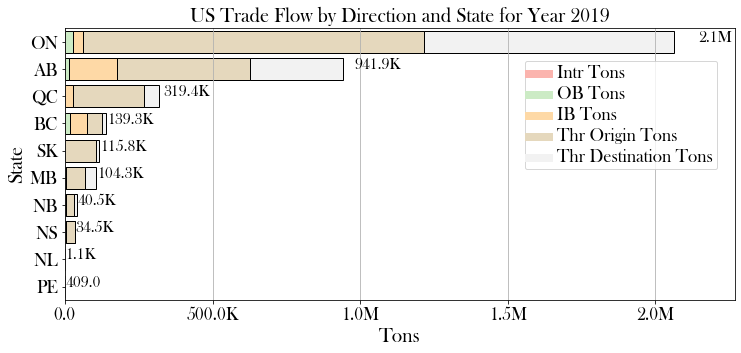

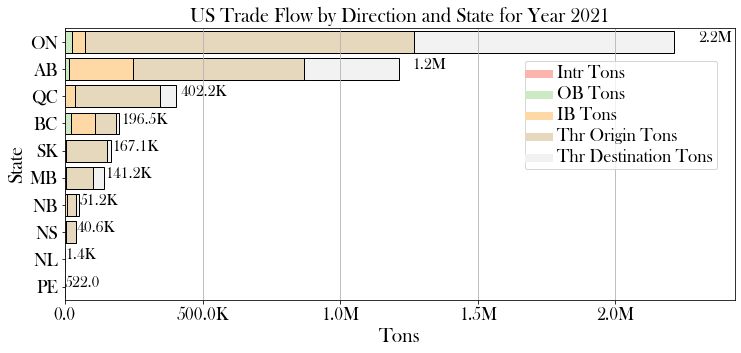

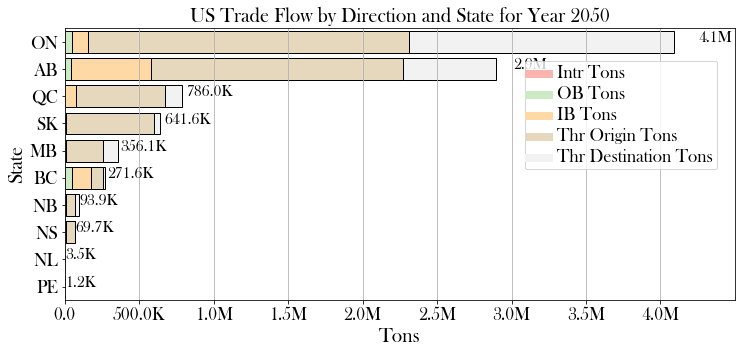

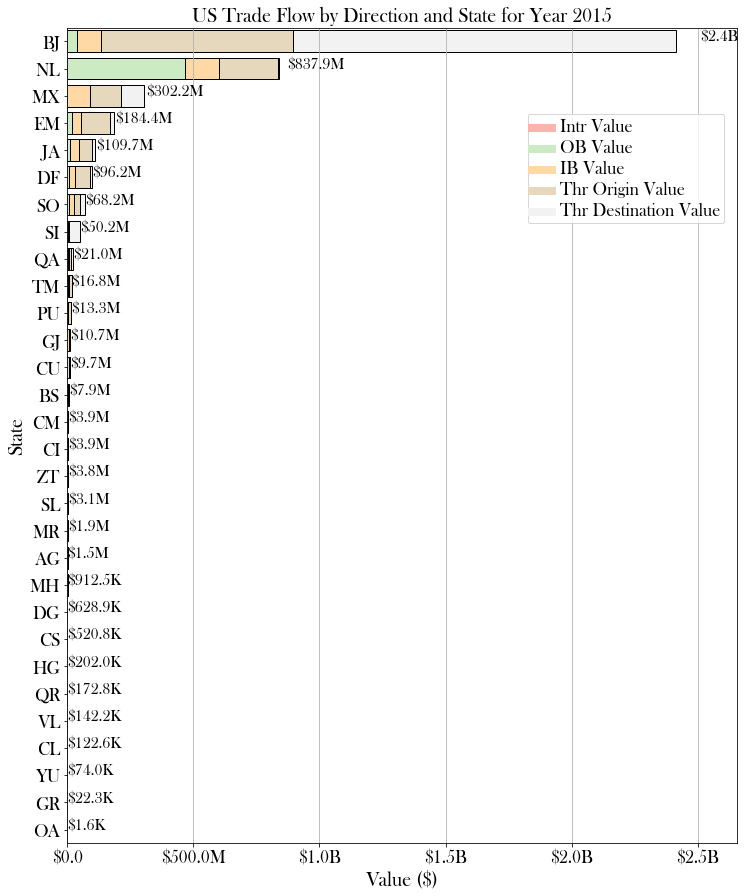

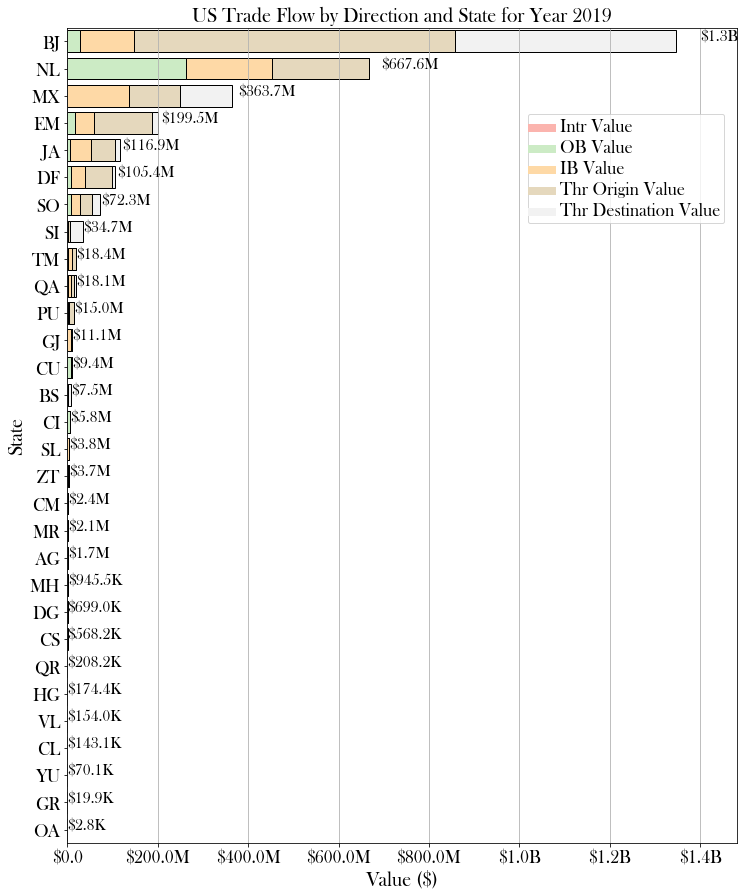

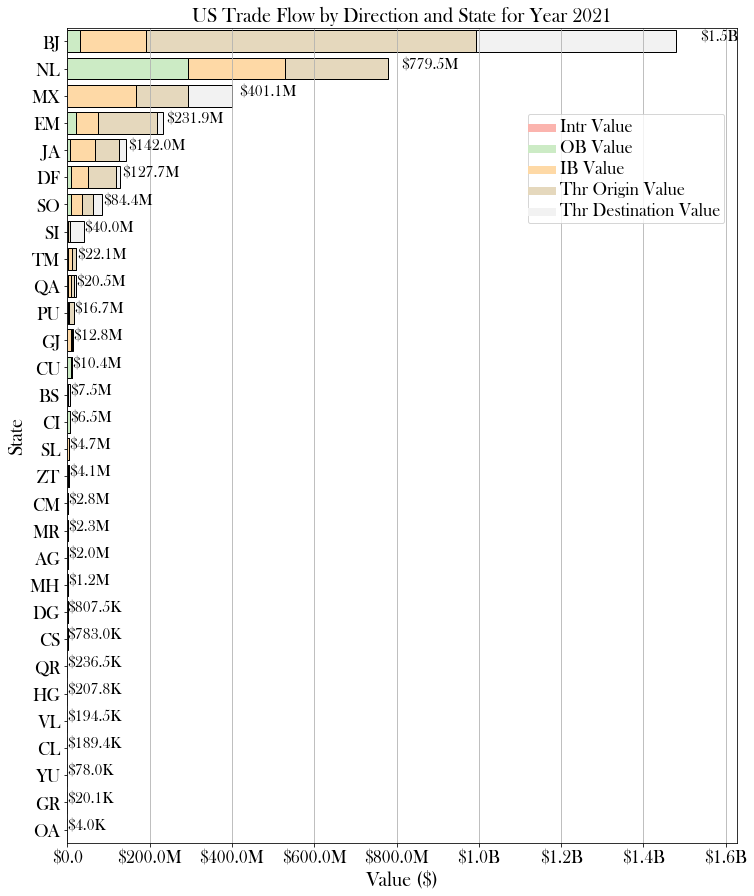

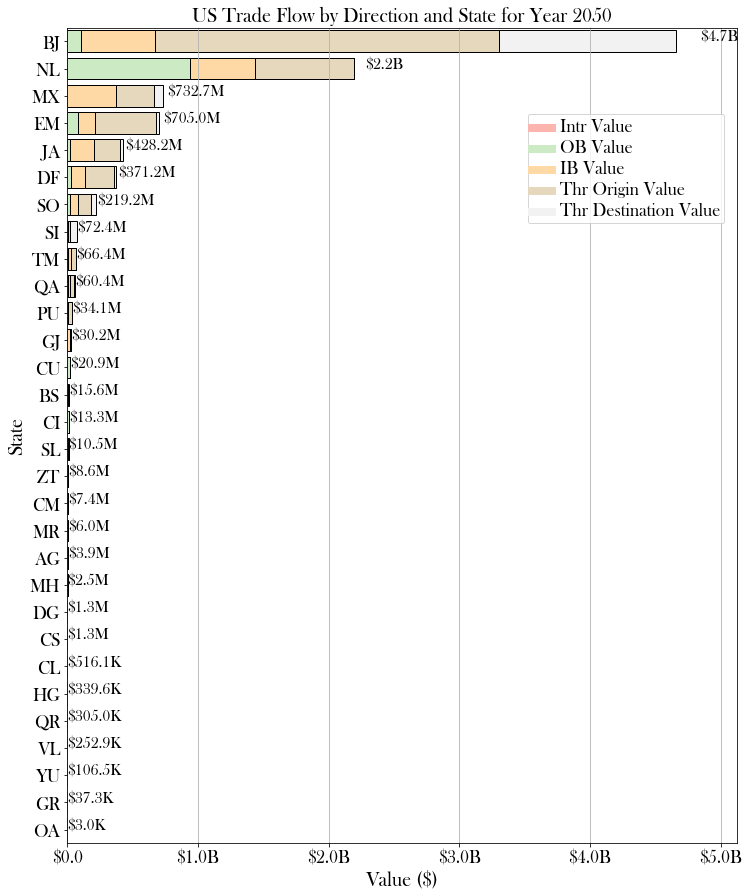

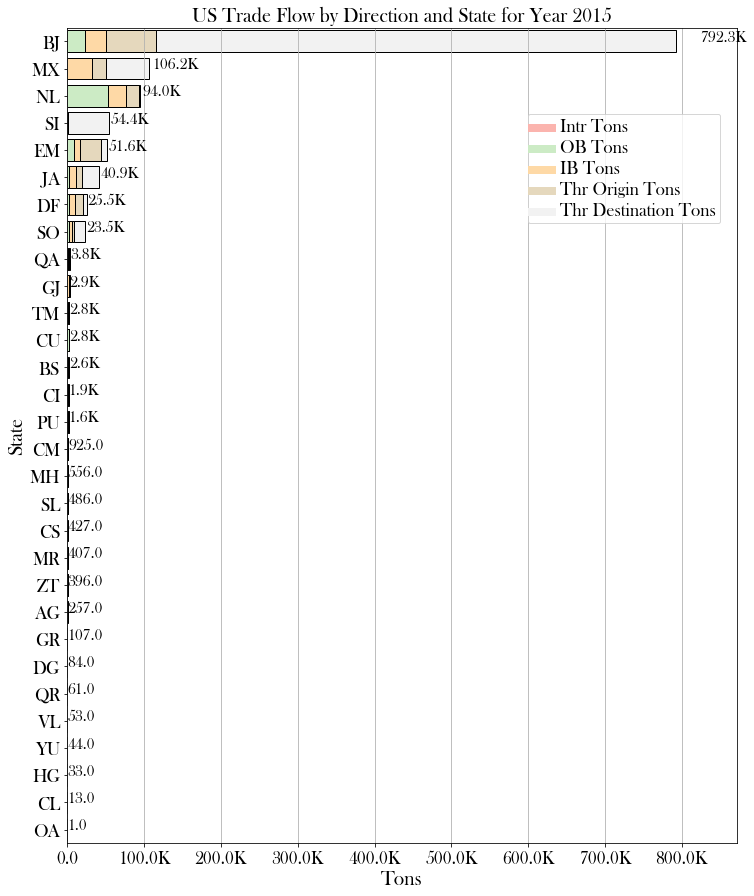

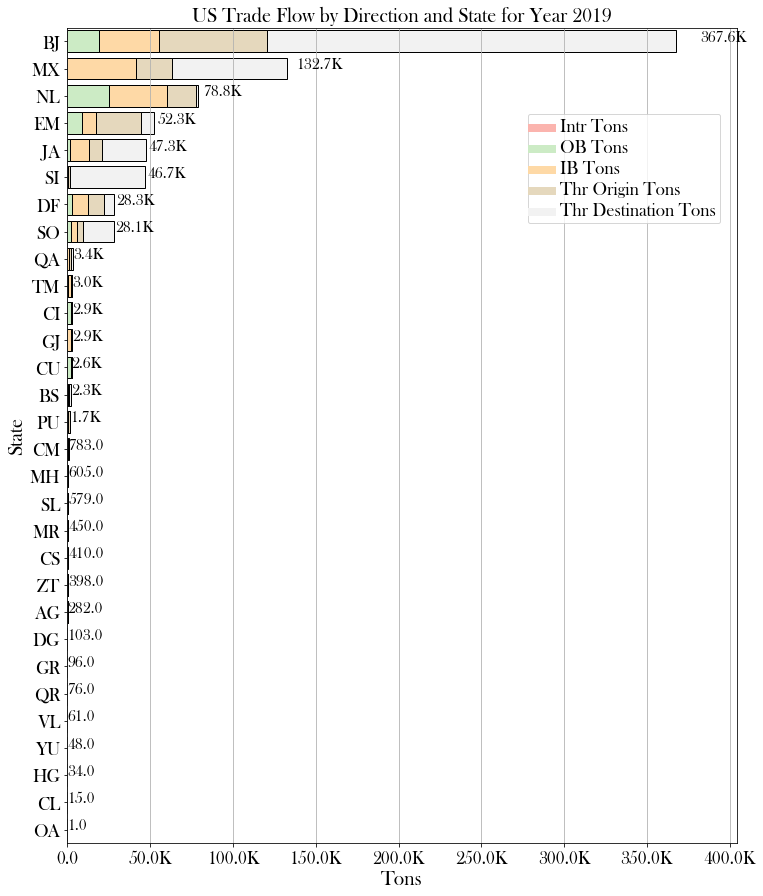

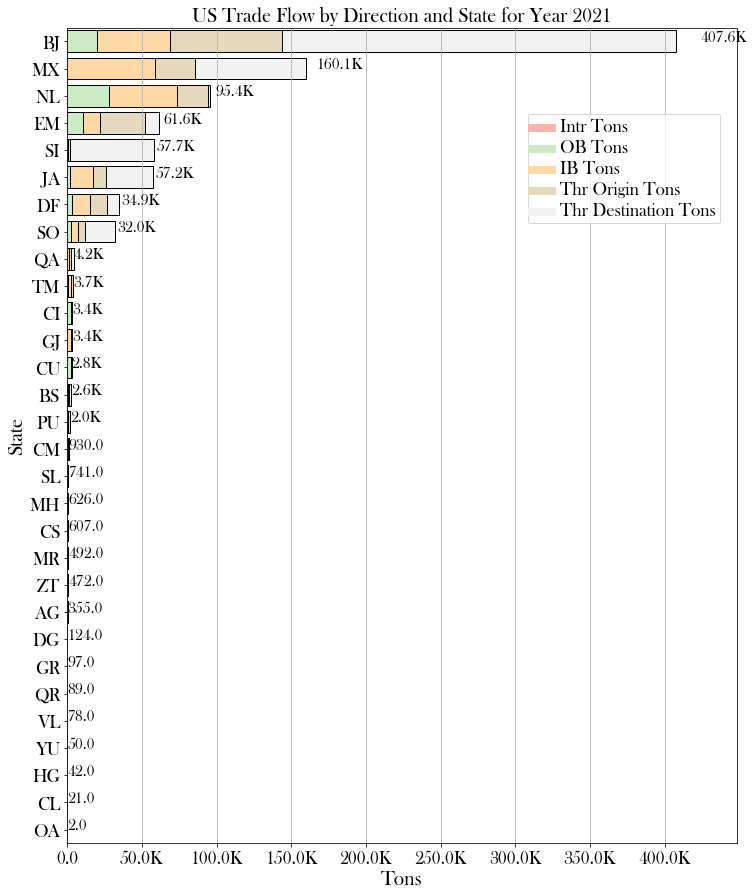

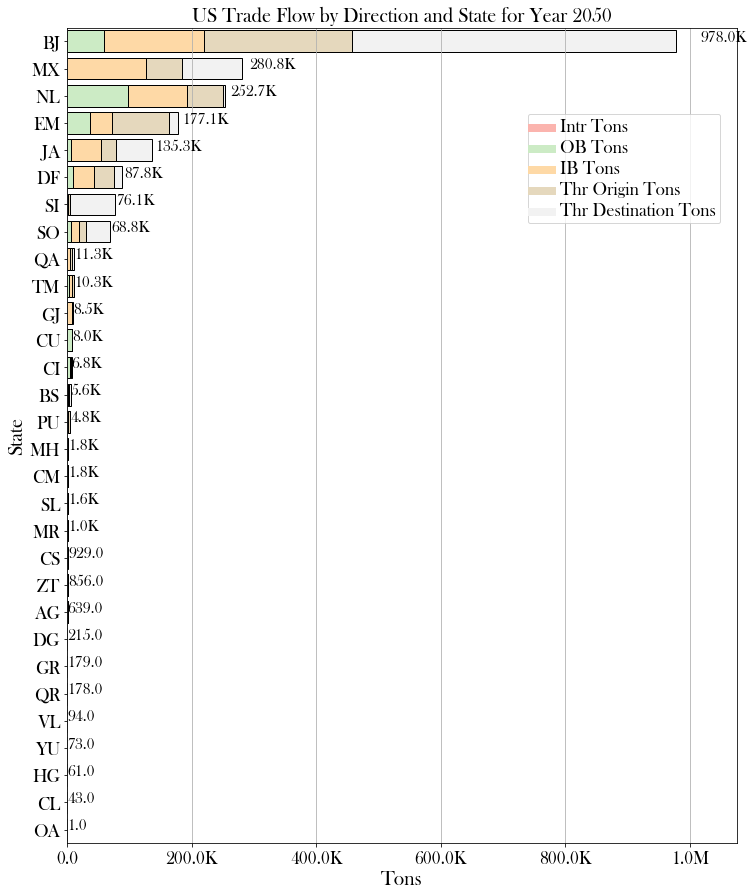

In [174]:
# Filter the data by country and create copies
final_summary_CA = final_summary_ST[final_summary_ST['Country'] == 'CA'].copy()
final_summary_MX = final_summary_ST[final_summary_ST['Country'] == 'MX'].copy()

# List of columns to round
columns_to_round = ['Intr Tons', 'OB Tons', 'IB Tons', 'Thr Origin Tons', 'Thr Destination Tons']

# Replace NaN values with 0 and round to one decimal place for CA
for col in columns_to_round:
    final_summary_CA[col] = final_summary_CA[col].fillna(0).round(0)

# Replace NaN values with 0 and round to one decimal place for MX
for col in columns_to_round:
    final_summary_MX[col] = final_summary_MX[col].fillna(0).round(0)

# Call the function with the filtered and rounded DataFrame for CA
create_stacked_bar_chart(final_summary_CA, data_type='Value', group_by='State')
create_stacked_bar_chart(final_summary_CA, data_type='Tons', group_by='State')

# Call the function with the filtered and rounded DataFrame for MX
create_stacked_bar_chart(final_summary_MX, data_type='Value', group_by='State')
create_stacked_bar_chart(final_summary_MX, data_type='Tons', group_by='State')


In [164]:
# Print the 'Tons' data for Mexico before transformations
print(final_summary_MX[columns_to_round].head())

# Replace NaN values with 0 and round to one decimal place for MX
for col in columns_to_round:
    final_summary_MX[col] = final_summary_MX[col].fillna(0).round(1)

# Print the 'Tons' data for Mexico after transformations
print(final_summary_MX[columns_to_round].head())


    Intr Tons  OB Tons  IB Tons  Thr Origin Tons  Thr Destination Tons
1         0.0     40.3    133.5              9.0                  75.4
7         0.0  22597.8  28146.2          64294.3              677282.3
8         0.0     97.5    357.0            312.0                1812.8
10        0.0   1248.0    210.1             58.1                 340.5
11        0.0    431.8     85.9              0.0                 406.7
    Intr Tons  OB Tons  IB Tons  Thr Origin Tons  Thr Destination Tons
1         0.0     40.3    133.5              9.0                  75.4
7         0.0  22597.8  28146.2          64294.3              677282.3
8         0.0     97.5    357.0            312.0                1812.8
10        0.0   1248.0    210.1             58.1                 340.5
11        0.0    431.8     85.9              0.0                 406.7


In [18]:
# Define the flow types
flow_types = ['OB Value', 'IB Value', 'Thr Origin Value', 'Thr Destination Value']

# Iterate through the unique years
for year in final_summary_C['Year'].unique():
    # Filter data for the specific year
    year_data = final_summary_C[final_summary_C['Year'] == year]
    
    # Calculate the total for all flow types in the year
    total_for_year = year_data[flow_types].sum().sum()
    
    # Calculate the percentage share for each flow type and add as new columns
    for flow_type in flow_types:
        percentage_column_name = flow_type + ' Percentage'
        final_summary_C.loc[final_summary_C['Year'] == year, percentage_column_name] = final_summary_C[flow_type] / total_for_year * 100

# Print the updated DataFrame with the new percentage columns
print(final_summary_C)


    Year Country      OB Value       OB Tons      IB Value       IB Tons  \
0   2015      CA  2.740712e+08  6.972143e+04  3.789786e+08  2.585833e+05   
1   2015      MX  5.694821e+08  9.782909e+04  4.674276e+08  1.182158e+05   
2   2015      US  5.359368e+09  6.016162e+06  2.737902e+10  1.724997e+07   
3   2019      CA  2.782379e+08  6.178344e+04  4.950276e+08  2.856832e+05   
4   2019      MX  3.517738e+08  6.529158e+04  6.202555e+08  1.546833e+05   
5   2019      US  6.044934e+09  5.811412e+06  2.715480e+10  1.812372e+07   
6   2021      CA  3.456530e+08  6.752876e+04  7.221300e+08  4.163034e+05   
7   2021      MX  3.901267e+08  7.220680e+04  7.931717e+08  2.070051e+05   
8   2021      US  6.238153e+09  5.865877e+06  2.764964e+10  1.784366e+07   
9   2050      CA  5.936028e+08  1.395114e+05  1.519939e+09  8.671547e+05   
10  2050      MX  1.249758e+09  2.319518e+05  2.004601e+09  5.356965e+05   
11  2050      US  1.000863e+10  7.395231e+06  4.530229e+10  2.511628e+07   

    Thr Ori

In [85]:
final_summary_C.to_excel(r'H:\My Drive\7. SNV Industry Study\1.) Summary\Country\Files\Summary_C.xlsx', index=False)

In [82]:
print(final_summary_ST['State'].unique())


['AB' 'AG' 'AK' 'AL' 'AR' 'AZ' 'BC' 'BJ' 'BS' 'CA' 'CI' 'CM' 'CO' 'CT'
 'CU' 'DC' 'DE' 'DF' 'DG' 'EM' 'FL' 'GA' 'GJ' 'HG' 'HI' 'IA' 'ID' 'IL'
 'IN' 'JA' 'KS' 'KY' 'LA' 'MA' 'MB' 'MD' 'ME' 'MH' 'MI' 'MN' 'MO' 'MR'
 'MS' 'MT' 'MX' 'NB' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NL' 'NM' 'NS' 'NV' 'NY'
 'OH' 'OK' 'ON' 'OR' 'PA' 'PU' 'QA' 'QC' 'QR' 'RI' 'SC' 'SD' 'SI' 'SK'
 'SL' 'SO' 'TM' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' 'ZT' 'CL'
 'OA' 'PE' 'VL' 'YU' 'CS' 'GR']


In [176]:
print(final_summary_C.columns)

Index(['Year', 'Country', 'OB Value', 'OB Tons', 'IB Value', 'IB Tons',
       'Thr Origin Value', 'Thr Origin Tons', 'Thr Destination Value',
       'Thr Destination Tons', 'Intr Value', 'Intr Tons'],
      dtype='object')


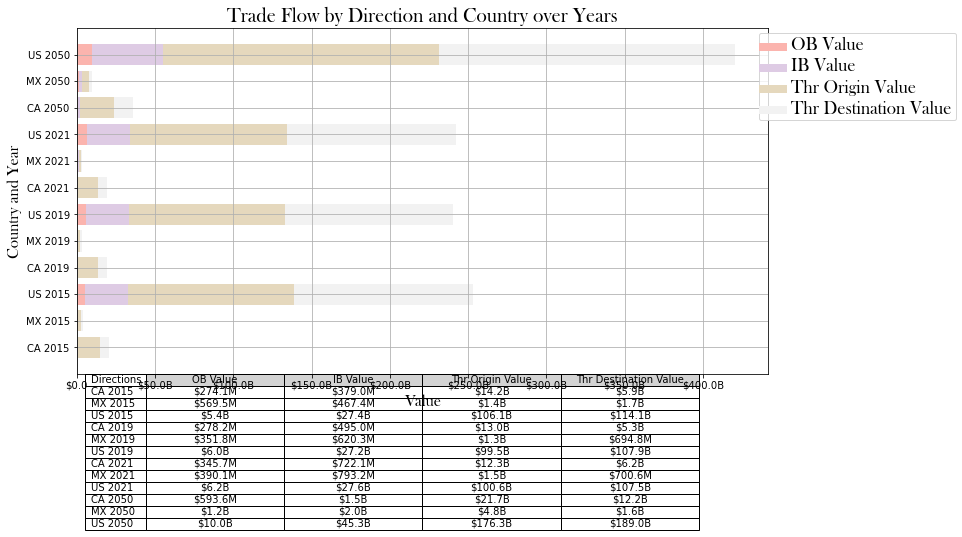

In [44]:
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties



# Font properties
font = FontProperties(family='Baskerville Old Face')

# Value formatter
def value_formatter(x, pos):
    return f'${x / 1_000_000_000:.1f}B' if x >= 1_000_000_000 else f'${x / 1_000_000:.1f}M' if x >= 1_000_000 else f'${x / 1_000:.1f}K' if x >= 1_000 else f'${x}'

def create_stacked_bar_chart(df):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_position([0.1, 0.3, 0.8, 0.6]) # Adjust this line to set the position of the axes
    
    directions = ['OB Value', 'IB Value', 'Thr Origin Value', 'Thr Destination Value']
    colors = plt.cm.Pastel1(np.linspace(0, 1, len(directions)))

    for year in df['Year'].unique():
        year_data = df[df['Year'] == year]
        total_for_year = year_data[directions].sum().sum()
        for idx, row in year_data.iterrows():
            left_value = 0
            for i, direction in enumerate(directions):
                percent_share = (row[direction] / total_for_year) * 100
                ax.barh(row['Country'] + ' ' + str(row['Year']), row[direction],
                        color=colors[i], left=left_value, label=direction if year == df['Year'].unique()[0] else "", alpha=1.0)

                left_value += row[direction]

    legend_elements = [plt.Line2D([0], [0], color=colors[i], lw=8, label=direction) for i, direction in enumerate(directions)]
    legend = ax.legend(handles=legend_elements, bbox_to_anchor=(0.98, 1), loc='upper left')

    for text in legend.get_texts():
        text.set_fontproperties(font)
        text.set_fontsize(18)

    ax.xaxis.set_major_formatter(FuncFormatter(value_formatter))
    ax.set_title('Trade Flow by Direction and Country over Years', fontsize=20, fontproperties=font)
    ax.set_xlabel('Value', fontsize=16, fontproperties=font)
    ax.set_ylabel('Country and Year', fontsize=16, fontproperties=font)
    ax.grid(True)

    # Add table
    table_data = [directions]
    for year in df['Year'].unique():
        year_data = df[df['Year'] == year]
        for idx, row in year_data.iterrows():
            table_data.append([f'{value_formatter(v, None)}' for v in row[directions].values])

    table_row_labels = ['Directions'] + [f"{row['Country']} {row['Year']}" for _, row in df.iterrows()]
    cell_colors = [['lightgray'] * len(directions)] + [['white'] * len(directions) for _ in range(len(df))]
    ax.table(cellText=table_data, rowLabels=table_row_labels, loc='bottom', cellLoc='center', colWidths=[0.2] * len(directions), cellColours=cell_colors)






# Call the function with the final_summary_C DataFrame
create_stacked_bar_chart(final_summary_C)


In [31]:
final_summary_C

,Year,Country,OB Value,OB Tons,IB Value,IB Tons,Thr Origin Value,Thr Origin Tons,Thr Destination Value,Thr Destination Tons,Intr Value,Intr Tons
0,2015,CA,2.740712e+08,6.972143e+04,3.789786e+08,2.585833e+05,1.422369e+10,2.355831e+06,5.879073e+09,1.284952e+06,NaN,NaN
1,2015,MX,5.694821e+08,9.782909e+04,4.674276e+08,1.182158e+05,1.410144e+09,1.527795e+05,1.716161e+09,8.421733e+05,NaN,NaN
2,2015,US,5.359368e+09,6.016162e+06,2.737902e+10,1.724997e+07,1.060750e+11,4.819453e+07,1.141137e+11,4.857602e+07,8.165316e+09,1.610371e+07
3,2019,CA,2.782379e+08,6.178344e+04,4.950276e+08,2.856832e+05,1.304373e+10,2.124855e+06,5.325549e+09,1.287333e+06,NaN,NaN
4,2019,MX,3.517738e+08,6.529158e+04,6.202555e+08,1.546833e+05,1.342453e+09,1.590279e+05,6.947760e+08,4.260010e+05,NaN,NaN
5,2019,US,6.044934e+09,5.811412e+06,2.715480e+10,1.812372e+07,9.953154e+10,4.633434e+07,1.078974e+11,4.690489e+07,9.045947e+09,1.633485e+07
6,2021,CA,3.456530e+08,6.752876e+04,7.221300e+08,4.163034e+05,1.231587e+10,2.519731e+06,6.196029e+09,1.423040e+06,NaN,NaN
7,2021,MX,3.901267e+08,7.220680e+04,7.931717e+08,2.070051e+05,1.518588e+09,1.831356e+05,7.006417e+08,4.713985e+05,NaN,NaN
8,2021,US,6.238153e+09,5.865877e+06,2.764964e+10,1.784366e+07,1.005795e+11,4.593842e+07,1.075173e+11,4.674685e+07,9.073076e+09,1.606648e+07
9,2050,CA,5.936028e+08,1.395114e+05,1.519939e+09,8.671547e+05,2.166383e+10,5.499458e+06,1.223031e+10,2.702818e+06,NaN,NaN


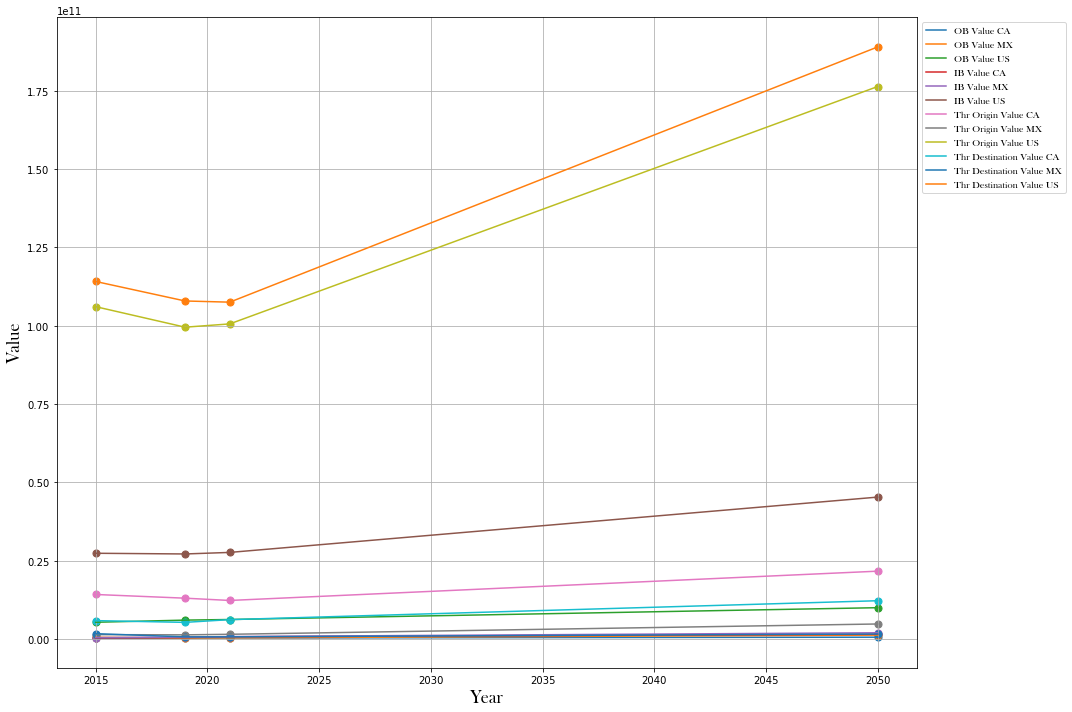

In [27]:
# Pivot the DataFrame
pivot_data = final_summary_C.pivot(index='Year', columns='Country', values=['OB Value', 'IB Value', 'Thr Origin Value', 'Thr Destination Value'])

# Plotting function adapted for your data
def create_time_series_plot(df):
    fig, ax = plt.subplots(figsize=(15, 10))

    for direction in df.columns.levels[0]:
        for country in df.columns.levels[1]:
            ax.plot(df.index, df[direction][country], label=f'{direction} {country}')
            ax.scatter(df.index, df[direction][country], s=50)

    # Additional customization (legend, labels, etc.)
    legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14, prop=font)
    ax.set_xlabel('Year', fontsize=18, fontproperties=font)
    ax.set_ylabel('Value', fontsize=18, fontproperties=font)
    ax.grid(True)
    plt.tight_layout()
    plt.show()

create_time_series_plot(pivot_data)


In [17]:
# Filter data for specific years
final_summary_C_years = final_summary_C[final_summary_C['Year'].isin([2015, 2019, 2021, 2050])]

# Flow types to consider
flow_types = ['OB Value', 'IB Value', 'Thr Origin Value', 'Thr Destination Value']

# Calculate the total for each flow type and year
flow_type_totals_per_year = final_summary_C_years.groupby('Year')[flow_types].sum()

# Compute the percentage share for each country and flow type
percentage_shares = []
for index, row in final_summary_C_years.iterrows():
    year = row['Year']
    country = row['Country']
    for flow_type in flow_types:
        percentage_share = row[flow_type] / flow_type_totals_per_year.loc[year, flow_type] * 100
        percentage_shares.append({
            'Year': year,
            'Country': country,
            'Flow Type': flow_type,
            'Percentage Share': percentage_share
        })

# Create a DataFrame with the percentage shares
percentage_share_df = pd.DataFrame(percentage_shares)

# You can print or export this DataFrame as needed
print(percentage_share_df)


    Year Country              Flow Type  Percentage Share
0   2015      CA               OB Value          4.418422
1   2015      CA               IB Value          1.342685
2   2015      CA       Thr Origin Value         11.686650
3   2015      CA  Thr Destination Value          4.830438
4   2015      MX               OB Value          9.180869
5   2015      MX               IB Value          1.656051
6   2015      MX       Thr Origin Value          1.158621
7   2015      MX  Thr Destination Value          1.410054
8   2015      US               OB Value         86.400710
9   2015      US               IB Value         97.001264
10  2015      US       Thr Origin Value         87.154729
11  2015      US  Thr Destination Value         93.759508
12  2019      CA               OB Value          4.168392
13  2019      CA               IB Value          1.751065
14  2019      CA       Thr Origin Value         11.450133
15  2019      CA  Thr Destination Value          4.674908
16  2019      

In [15]:
# Filter data for specific years
final_summary_C_years = final_summary_C[final_summary_C['Year'].isin([2015, 2019, 2021, 2050])]

# Calculate the total for each flow type and country for each year
flow_types = ['OB Value', 'IB Value', 'Thr Origin Value', 'Thr Destination Value']
country_totals_per_year = final_summary_C_years.groupby(['Year', 'Country'])[flow_types].sum().reset_index()

# Calculate the grand total for each year
grand_totals_per_year = country_totals_per_year.groupby('Year')[flow_types].sum()

# Compute the percentage share for each country and flow type
percentage_shares = []
for index, row in country_totals_per_year.iterrows():
    year = row['Year']
    grand_totals = grand_totals_per_year.loc[year]
    percentage_share_row = {
        'Year': year,
        'Country': row['Country']
    }
    for flow_type in flow_types:
        percentage_share_row[flow_type] = row[flow_type] / grand_totals[flow_type] * 100
    percentage_shares.append(percentage_share_row)

# Create a DataFrame with the percentage shares
percentage_share_df = pd.DataFrame(percentage_shares)

# You can print or export this DataFrame as needed
print(percentage_share_df)
percentage_share_df

    Year Country   OB Value   IB Value  Thr Origin Value  \
0   2015      CA   4.418422   1.342685         11.686650   
1   2015      MX   9.180869   1.656051          1.158621   
2   2015      US  86.400710  97.001264         87.154729   
3   2019      CA   4.168392   1.751065         11.450133   
4   2019      MX   5.270063   2.194035          1.178441   
5   2019      US  90.561545  96.054900         87.371427   
6   2021      CA   4.956357   2.476021         10.764307   
7   2021      MX   5.594071   2.719607          1.327275   
8   2021      US  89.449573  94.804372         87.908418   
9   2050      CA   5.008465   3.112917         10.682315   
10  2050      MX  10.544706   4.105532          2.370718   
11  2050      US  84.446829  92.781551         86.946966   

    Thr Destination Value  
0                4.830438  
1                1.410054  
2               93.759508  
3                4.674908  
4                0.609893  
5               94.715199  
6                5.4154

,Year,Country,OB Value,IB Value,Thr Origin Value,Thr Destination Value
0,2015,CA,4.418422,1.342685,11.686650,4.830438
1,2015,MX,9.180869,1.656051,1.158621,1.410054
2,2015,US,86.400710,97.001264,87.154729,93.759508
3,2019,CA,4.168392,1.751065,11.450133,4.674908
4,2019,MX,5.270063,2.194035,1.178441,0.609893
5,2019,US,90.561545,96.054900,87.371427,94.715199
6,2021,CA,4.956357,2.476021,10.764307,5.415447
7,2021,MX,5.594071,2.719607,1.327275,0.612374
8,2021,US,89.449573,94.804372,87.908418,93.972178
9,2050,CA,5.008465,3.112917,10.682315,6.030700


  Country  Percentage Share
2      US         91.167948
0      CA          7.287143
1      MX          1.544908


In [22]:
# Apply filters to DataFrame
outbound, inbound, through, intra = filter_data(clark_county_ts2021)

# Summarize through traffic by Origin and Destination
through_origin_summary_C = summarize_flow_by_country(through, 'Thr Origin', 'Origin Country')
through_destination_summary_C = summarize_flow_by_country(through, 'Thr Destination', 'Destination Country')

# Check the total Value for through traffic by origin and destination
total_through_origin = through_origin_summary_C['Thr Origin Value'].sum()
total_through_destination = through_destination_summary_C['Thr Destination Value'].sum()

print(f"Total Through Origin Value: {total_through_origin}")
print(f"Total Through Destination Value: {total_through_destination}")

# Check if they are equal
if total_through_origin == total_through_destination:
    print("The through origin and destination values are equal.")
else:
    print("The through origin and destination values are not equal.")
    print(f"Difference: {abs(total_through_origin - total_through_destination)}")


Total Through Origin Value: 552841471775.4816
Total Through Destination Value: 552841471775.4811
The through origin and destination values are not equal.
Difference: 0.00048828125


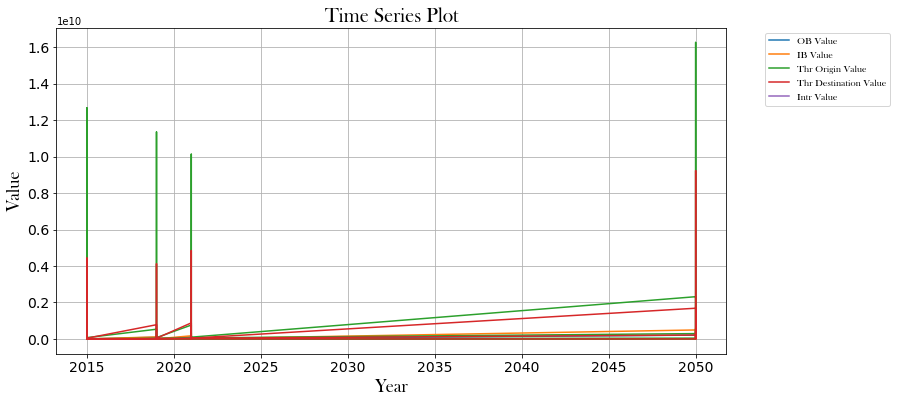

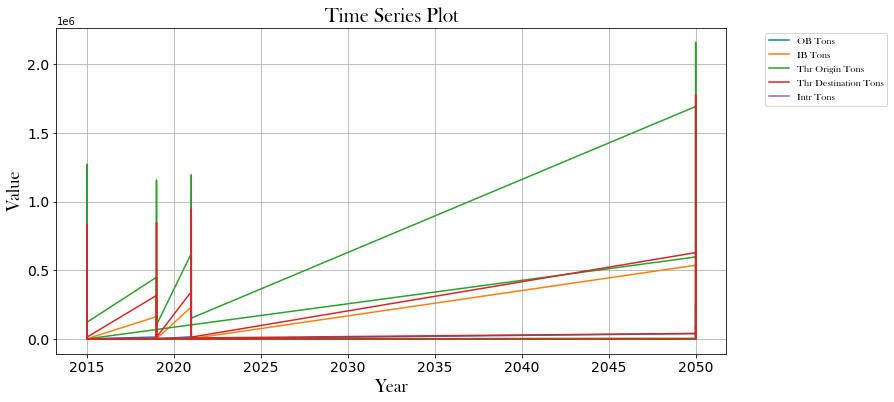

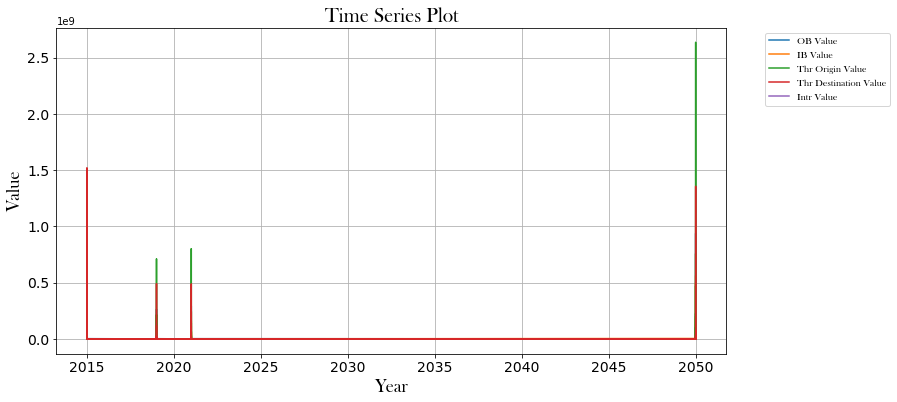

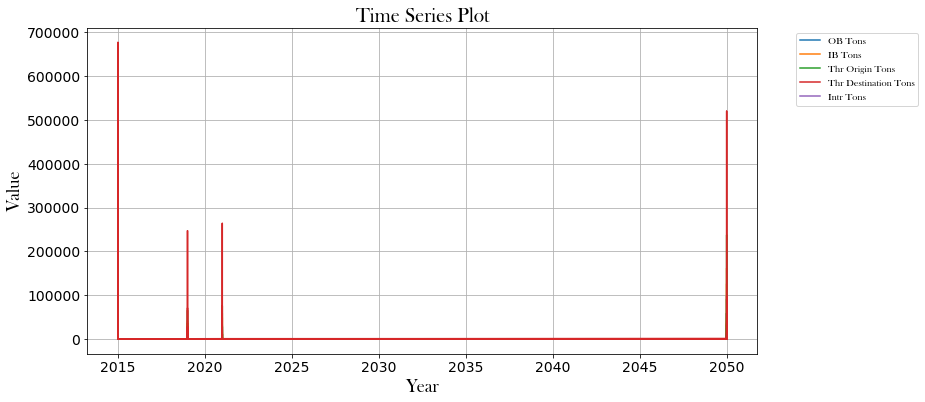

In [135]:
def create_time_series_plot(df, data_types=['OB Value', 'IB Value', 'Thr Origin Value', 'Thr Destination Value', 'Intr Value']):
    plt.figure(figsize=(12, 6))
    for data_type in data_types:
        plt.plot(df['Year'], df[data_type], label=data_type)

    plt.title(f'Time Series Plot', fontsize=20, fontproperties=font)
    plt.xlabel('Year', fontsize=18, fontproperties=font)
    plt.ylabel('Value', fontsize=18, fontproperties=font)
    plt.xticks(fontsize=14, fontproperties=font)
    plt.yticks(fontsize=14, fontproperties=font)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=font)
    plt.grid(True, linestyle='-')
    plt.show()

# Filter the data by country and call the function for each country
final_summary_CA = final_summary_ST[final_summary_ST['Country'] == 'CA']
final_summary_MX = final_summary_ST[final_summary_ST['Country'] == 'MX']

# Call the function with the filtered DataFrame for CA
create_time_series_plot(final_summary_CA)
create_time_series_plot(final_summary_CA, data_types=['OB Tons', 'IB Tons', 'Thr Origin Tons', 'Thr Destination Tons', 'Intr Tons'])

# Call the function with the filtered DataFrame for MX
create_time_series_plot(final_summary_MX)
create_time_series_plot(final_summary_MX, data_types=['OB Tons', 'IB Tons', 'Thr Origin Tons', 'Thr Destination Tons', 'Intr Tons'])


In [136]:
final_summary_MX

,Year,State,Country,OB Value,OB Tons,IB Value,IB Tons,Thr Origin Value,Thr Origin Tons,Thr Destination Value,Thr Destination Tons,Intr Value,Intr Tons
1,2015,AG,MX,1.825927e+05,40.342971,1.152363e+06,133.478185,3.508684e+04,9.018925,1.070827e+05,75.362247,NaN,NaN
7,2015,BJ,MX,3.701178e+07,22597.814435,9.685449e+07,28146.154361,7.619508e+08,64294.301070,1.517942e+09,677282.346794,NaN,NaN
8,2015,BS,MX,3.842598e+05,97.534099,3.791674e+05,357.035700,8.572173e+05,311.959484,6.297681e+06,1812.793654,NaN,NaN
10,2015,CI,MX,3.036099e+06,1247.974492,1.785099e+05,210.149212,1.674728e+05,58.100743,4.848390e+05,340.520128,NaN,NaN
11,2015,CM,MX,2.363323e+06,431.832693,8.911299e+05,85.865020,NaN,NaN,6.616571e+05,406.700688,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2050,CS,MX,NaN,NaN,NaN,NaN,5.634302e+05,213.229817,6.944943e+05,716.362693,NaN,NaN
360,2015,GR,MX,NaN,NaN,NaN,NaN,NaN,NaN,2.226264e+04,107.039710,NaN,NaN
361,2019,GR,MX,NaN,NaN,NaN,NaN,NaN,NaN,1.992906e+04,95.819725,NaN,NaN
362,2021,GR,MX,NaN,NaN,NaN,NaN,NaN,NaN,2.008356e+04,96.562607,NaN,NaN


In [177]:
# Function to format monetary values
def format_money(x):
    if x >= 1_000_000_000:
        return f'${x / 1_000_000_000:.2f}B'
    elif x >= 1_000_000:
        return f'${x / 1_000_000:.2f}M'
    elif x >= 1_000:
        return f'${x / 1_000:.2f}K'
    else:
        return f'${x:.2f}'

# Function to format tons
def format_tons(x):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x / 1_000:.1f}K'
    else:
        return f'{x:.1f}'

# Apply formatting to relevant columns
money_columns = ['OB Value', 'IB Value', 'Thr Origin Value', 'Thr Destination Value', 'Intr Value']
ton_columns = ['OB Tons', 'IB Tons', 'Thr Origin Tons', 'Thr Destination Tons', 'Intr Tons']

for col in money_columns:
    final_summary_C[col] = final_summary_C[col].apply(format_money)

for col in ton_columns:
    final_summary_C[col] = final_summary_C[col].apply(format_tons)

# Save to Excel
final_summary_C.to_excel(r'H:\My Drive\7. SNV Industry Study\1.) Summary\Country\Files\Summary_CFORMATTED.xlsx', index=False)
